In [1]:
from scipy import stats
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import h5netcdf
import datetime
import numpy as np
import glob
import matplotlib.animation as animation
from datetime import datetime,timedelta
import plotly.express as px
import plotly.graph_objects as go
import os
import pickle
import matplotlib
import matplotlib.patches as patches
import multiprocessing
from multiprocessing import Pool
import dask.array as da
import itertools
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.signal import welch
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
from datetime import datetime
import os

import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspecX
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes as crs_geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import shapely.geometry as sgeom
import copy
import seaborn as sns
from sklearn.neighbors import KernelDensity
import pickle
from datetime import datetime, timedelta


In [2]:
m_list = ['MAM','JJA','SON','DJF']
s_list = m_list[0]
s_list_jja = m_list[1]
s_dict = {'MAM':[3,4,5],'JJA':[6,7,8],'SON':[9,10,11],'DJF':[1,2,12]}
sd_dict = {'MAM':92,'JJA':92,'SON':91,'DJF':90}

In [3]:
# Define the start and end years
start_year = 2004
end_year = 2017

# Create an empty list to store the dates
dates_list = []

# Iterate through the years
for year in range(start_year, end_year + 1):
    # Define the range of months to be considered: June, July, and August
    for month in s_dict[s_list]:  # June (6), July (7), August (8)
        # Create a date range for the current month of the current year, correctly handling days
        month_dates = pd.date_range(start=f"{year}-{month:02d}-01", 
                                    end=f"{year}-{month:02d}-{pd.Timestamp(f'{year}-{month:02d}').days_in_month}", 
                                    freq='D')
        # Append the dates to the list
        dates_list.extend(month_dates)

date_list = pd.to_datetime(dates_list)

# Print the total number of dates in the list and the first few dates
print(f"Total dates: {len(dates_list)}")
  # Display first 10 dates to check

Total dates: 1288


In [4]:
# Define the start and end years
start_year = 2004
end_year = 2017

# Create an empty list to store the dates
date_list_jja = []

# Iterate through the years
for year in range(start_year, end_year + 1):
    # Define the range of months to be considered: June, July, and August
    for month in s_dict[s_list_jja]:  # June (6), July (7), August (8)
        # Create a date range for the current month of the current year, correctly handling days
        month_dates = pd.date_range(start=f"{year}-{month:02d}-01", 
                                    end=f"{year}-{month:02d}-{pd.Timestamp(f'{year}-{month:02d}').days_in_month}", 
                                    freq='D')
        # Append the dates to the list
        date_list_jja.extend(month_dates)

date_list_jja = pd.to_datetime(date_list_jja)

# Print the total number of dates in the list and the first few dates
print(f"Total dates: {len(date_list_jja)}")
  # Display first 10 dates to check

Total dates: 1288


---
# NBAM MAM

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 5110
Feb 29 present: False
First few dates: DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-03-01', '2004-03-02'], dtype='datetime64[ns]', freq=None)
BI shape: (5110,)
BI JJA shape: (1288,)
BAM_event_all shape: 1000
3
2009-03-02 00:00:00
5
2010-05-02 00:00:00
4
2012-04-26 00:00:00
3
2017-03-07 00:00:00
4
2016-04-03 00:00:00
3
2012-03-20 00:00:00
5
2017-05-07 00:00:00
4
2004-04-29 00:00:00
4
2006-04-11 00:00:00
3
2016-03-09 00:00:00
3
2010-03-17 00:00:00
3
2004-03-02 00:00:00
5
2015-05-12 00:00:00
3
2007-03-19 00:00:00
3
2013-03-15 00:00:00
5
2010-05-25 00:00:00
3
2015-03-13 00:00:00
4
2008-04-26 00:00:00
4
2004-04-01 00:00:00
5
2014-05-13 00:00:00
5
2008-05-22 00:00:00
5
2006-05-16 00:00:00
4
2015-04-15 00:00:00
4
2009-04-27 00:00:00
5
2012-05-12 00:00:00
4
2014-04

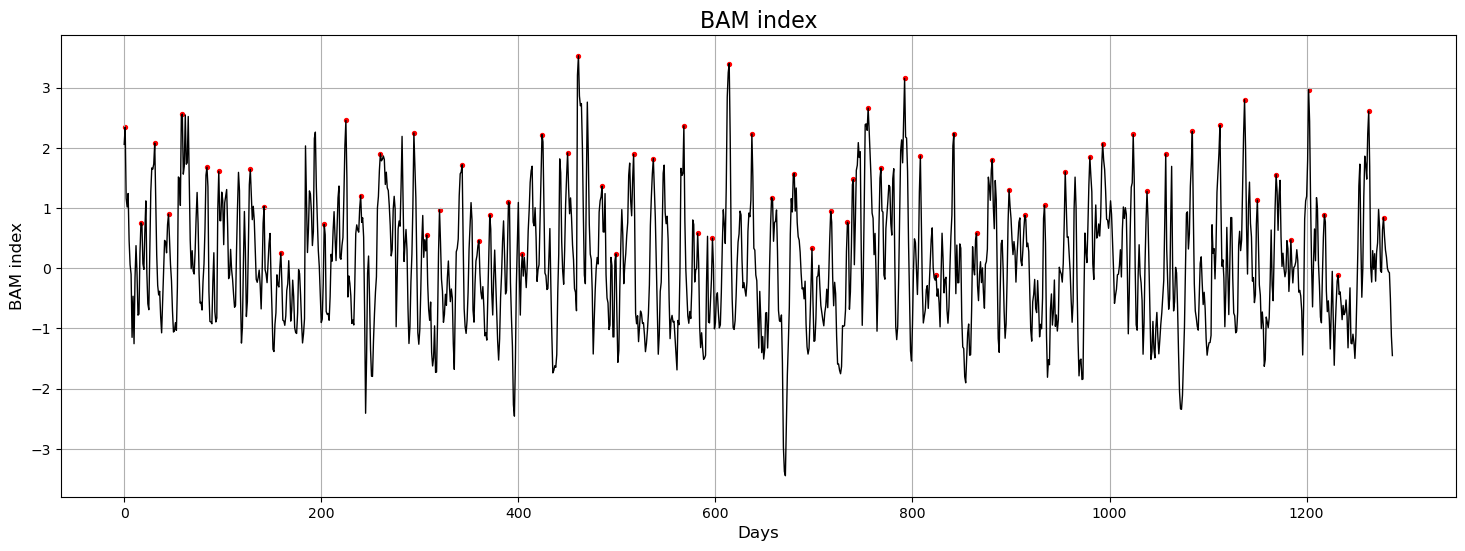

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


95 percentile is 2.909147628081814
80 percentile is 2.244008121368525
70 percentile is 1.9152670853589615
60 percentile is 1.8092293915659767
50 percentile is 1.5889187412689258
Minimum BAM index is -0.11969726753827381
8
7
13
0
18
10
13
17
14
10
8
9
1
2
0
13
0
1
12
11
0
[ 461  614  792 1202 1137  755 1263   59  225 1112  568    1 1084  294
  842  637 1024  424   31  993  450  260 1057  517  808  980  537  881
  343   84  768  128   96  955  680 1169  740  485  898 1038  240  657
 1150  390  934  142  320  717   45 1218  371  914 1278  734   17  203
  582  865  307  597 1184  360  698  159  499  404 1232  824]


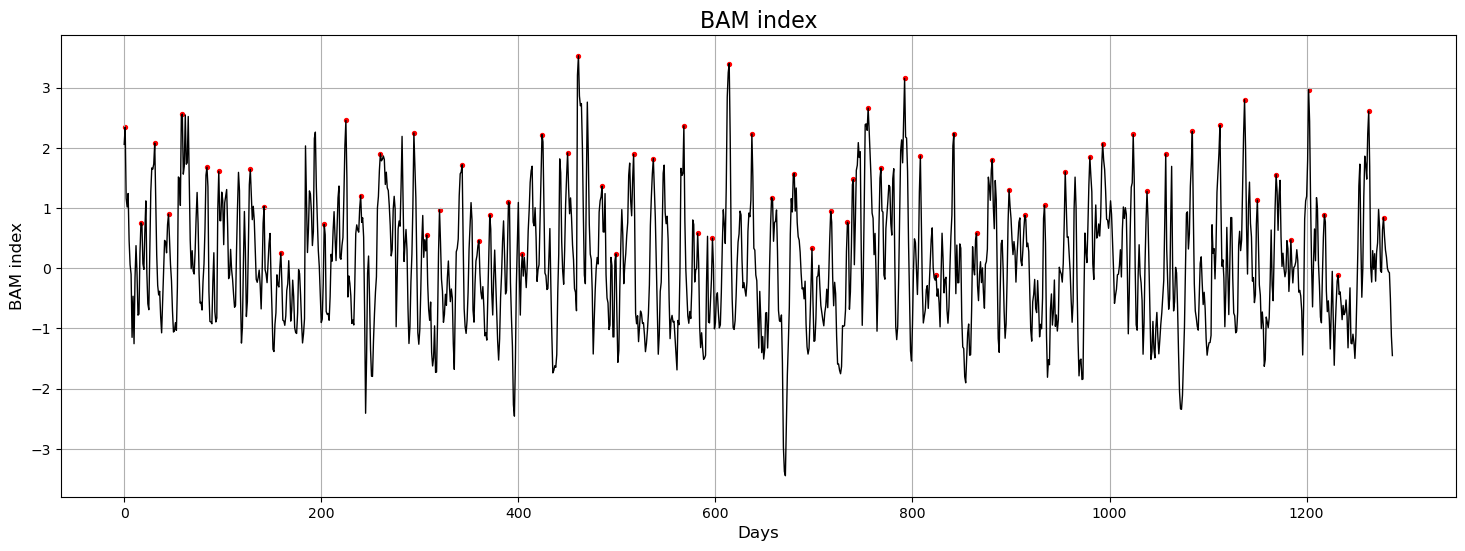

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


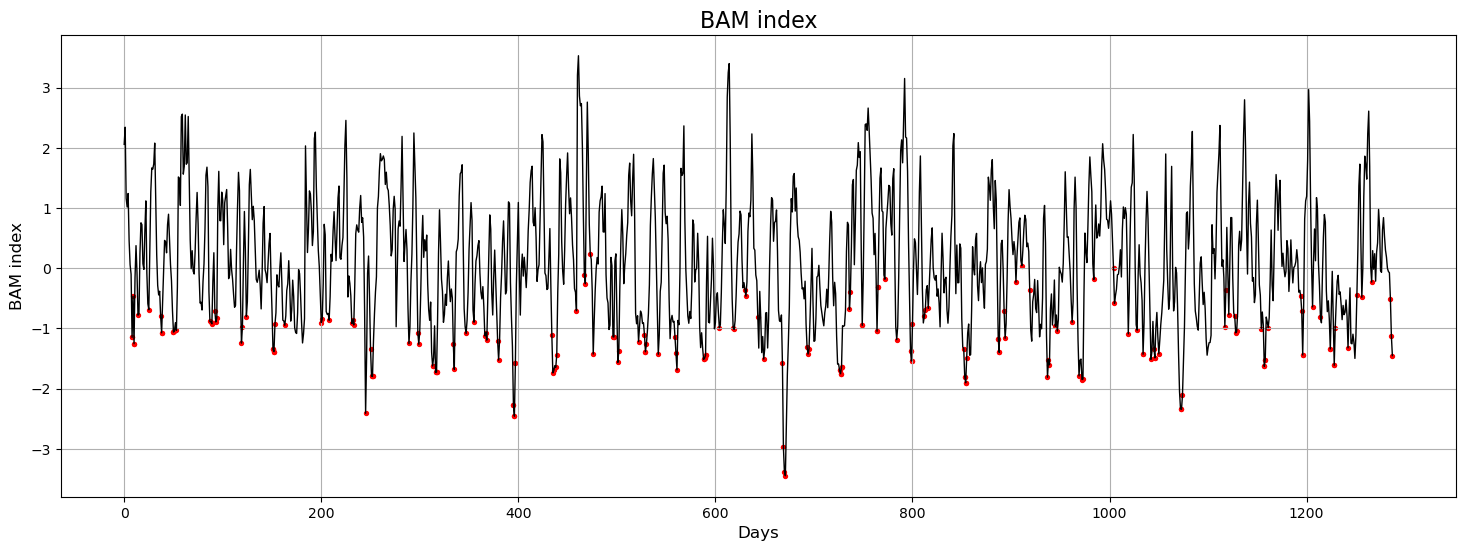

In [5]:
# ALL DAYS
with open('/scratch/negishi/zholder/NBAM_all.pkl','rb') as p:
    NBAMi = pickle.load(p)
with open('/scratch/negishi/zholder/NBAM_pac_all.pkl','rb') as p:
    NBAMi_pac = pickle.load(p)

# Create a list to hold the values for the years 2003 to 2010
filtered_values = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if s_dict[s_list][0] <= date.month <= s_dict[s_list][-1]:
            filtered_values.append(value)
st_filtered_values = [((i - np.mean(filtered_values))/np.std(filtered_values)) for i in filtered_values] 

bam_array = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if 1 <= date.month <= 12:
            bam_array.append(value)

#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import copy
import xarray as xr

# Time management
start_date = "2004-01-01"
end_date = "2017-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

# Get JJA
jja_index = np.where(dates.month.isin(s_dict[s_list]))[0]
Date_JJA = dates[jja_index]

print('Total JJA days: '+str(len(Date_JJA))) 
print('Date_JJA[0:2]: '+str(Date_JJA[0:2]))

# BAM index
# BI = np.load('../../output/NBAM_index_synoptic_no_leap.npy') # 1940 to 2023
BI = np.array([i for i in bam_array])
BI_JJA = BI[jja_index]

print('BI shape: '+str(BI.shape))
print('BI JJA shape: '+str(BI_JJA.shape))

n_season = 14                        ### no. of season
# season_day= 92
season_day= sd_dict[s_list]                      ### no. of days in one season
season_all = n_season*season_day     ### no. of days in all seasons

BI_copy = copy.copy(BI)
BAM_event_all = []      # BAM peaks  
BAM_event_BI_all = []   # The value of the BI at that peaking date
number = 0
while 1:
    # index = np.squeeze(np.array(np.where( BI_copy==np.nanmax(BI_copy) )))[0]
    index = np.nanargmax(BI_copy)
#    index: An integer representing the position of the maximum value in BI_copy at each iteration.
    if BI[index]>=BI[index+1] and BI[index]>=BI[index-1] and BI[index]>=BI[index+2] and BI[index]>=BI[index-2]:   # 5 consecutive days        
        BAM_event_all.append(index)
        BAM_event_BI_all.append(BI[index])
        number+=1
        BI_copy[index-12:index+13] = np.nan
        if number > 999:     #  1000 peaks selected 
            break
    else:
        BI_copy[index]=np.nan
        
print('BAM_event_all shape: '+str(len(BAM_event_all)))

# extract BAM event in JJA
BAM_event_JJA = []
BAM_event_date_JJA = [] 
for i in range(len(BAM_event_all)):
    if Month[BAM_event_all[i]] in s_dict[s_list]:
        BAM_event_JJA.append(BAM_event_all[i])
        BAM_event_date_JJA.append(dates[BAM_event_all[i]])
        print(Month[BAM_event_all[i]])
        print(dates[BAM_event_all[i]])

# index in the Date_JJA time series ###
BAM_event = []
BAM_event_BI = []
for i in np.arange(len(BAM_event_JJA)):
    t = np.where(np.array(Date_JJA) == BAM_event_date_JJA[i])[0][0]
    BAM_event.append(t)
    BAM_event_BI.append(BI_JJA[t])   # .append(BAM_event_JJA[i])
    print('check '+ str(BI_JJA[t]) +', '+str(BAM_event_JJA[i]) )

print('BAM_event_JJA size: '+str(len(BAM_event_JJA)))
print('BAM_event size: '+str(len(BAM_event)))

# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(BAM_event, BI_JJA[BAM_event], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

BAM_event = list(BAM_event)
BAM_event_BI = list(BAM_event_BI)

print('95 percentile is '+str(np.percentile(BAM_event_BI,95)))
print('80 percentile is '+str(np.percentile(BAM_event_BI,80)))
print('70 percentile is '+str(np.percentile(BAM_event_BI,70)))
print('60 percentile is '+str(np.percentile(BAM_event_BI,60)))
print('50 percentile is '+str(np.percentile(BAM_event_BI,50)))
print('Minimum BAM index is '+str(np.min(BAM_event_BI)))

# High and low BAM state
T=1
n_BAM = len(BAM_event_JJA)
HBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of high BAM state
LBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of low BAM state
for i in np.arange(n_BAM):
    #HBAM[i,:] = np.arange(BAM_event_JJA[i]-T,BAM_event_JJA[i]+T+1) # index in the entire duration
    HBAM[i,:] = np.arange(BAM_event[i]-T,BAM_event[i]+T+1)  # index in the JJA time series

for i in np.arange(n_BAM):
    index = BAM_event[i]
    if index%season_day-12<0:        
        BI_event = copy.copy(BI_JJA[index-(index%season_day):index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            print(index1)
            LBAM[i,d] = index-(index%season_day)+index1
            BI_event[index1] = np.nan
    elif index%season_day+12>season_day:
        BI_event = copy.copy(BI_JJA[index-12: index+(season_day-(index%season_day))])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan
    else:
        BI_event = copy.copy(BI_JJA[index-12:index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan

# np.savetxt('../../output/JJA/high_BAM_state_date_index_in_JJA.dat', HBAM, fmt='%f', delimiter=' ')
# np.savetxt('../../output/JJA/low_BAM_state_date_index_in_JJA.dat', LBAM, fmt='%f', delimiter=' ')

HI = HBAM[:,1].astype(int)
LI = LBAM.reshape(-1)
LI = LI.astype(int)
print(HI)
# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(HI, BI_JJA[HI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
ax.grid()
plt.show()
N = 300
# plot to check whether we get the correct BAM minimum date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(LI, BI_JJA[LI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
# plt.xlim(0,300)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

LI.sort()
HI.sort()



---

---
# NBAM JJA

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 5110
Feb 29 present: False
First few dates: DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-06-01', '2004-06-02'], dtype='datetime64[ns]', freq=None)
BI shape: (5110,)
BI JJA shape: (1288,)
BAM_event_all shape: 1000
6
2016-06-18 00:00:00
8
2015-08-27 00:00:00
7
2011-07-17 00:00:00
7
2007-07-17 00:00:00
6
2013-06-30 00:00:00
6
2006-06-08 00:00:00
8
2007-08-14 00:00:00
6
2010-06-11 00:00:00
6
2015-06-30 00:00:00
8
2010-08-29 00:00:00
6
2012-06-23 00:00:00
8
2004-08-14 00:00:00
7
2013-07-26 00:00:00
6
2011-06-27 00:00:00
8
2005-08-20 00:00:00
7
2006-07-21 00:00:00
6
2005-06-05 00:00:00
8
2010-08-16 00:00:00
7
2014-07-18 00:00:00
8
2008-08-13 00:00:00
6
2007-06-18 00:00:00
8
2014-08-13 00:00:00
6
2004-06-17 00:00:00
7
2010-07-02 00:00:00
6
2014-06-14 00:00:00
8
2009-08

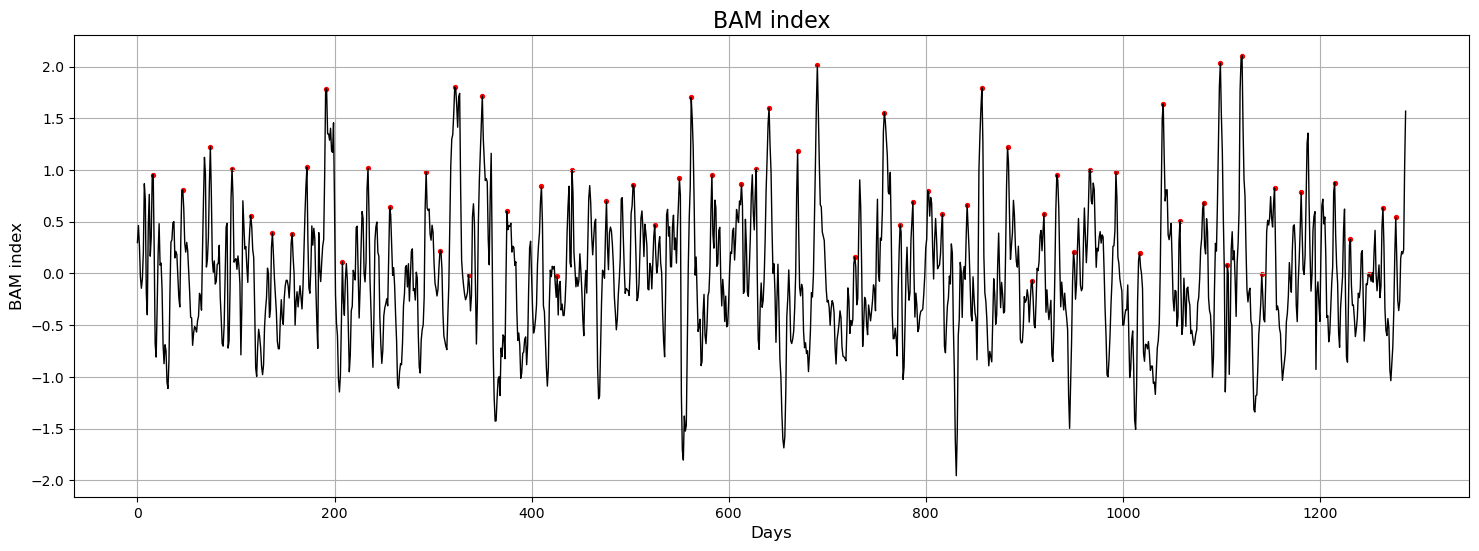

95 percentile is 1.7998746197750441
80 percentile is 1.2135500197571534
70 percentile is 0.998876936653404
60 percentile is 0.9381122092072759
50 percentile is 0.8166328598461932
Minimum BAM index is -0.06852609526747289
19
18
17
2
1
4
13
0
1
0
5
2
9
8
10
1
0
2
0
4
1
[1121 1099  690  322  857  191  350  562 1041  641  758   74  883  670
  172  234   96  628  967  441  293  993   16  583  933  550 1215  613
  503  410 1154   46  802 1181  476  787 1082  842  256 1264  375  920
  817  115 1277 1058  774  525  137  157 1231  307  950 1017  728  208
 1106 1141 1250  336  426  908]


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


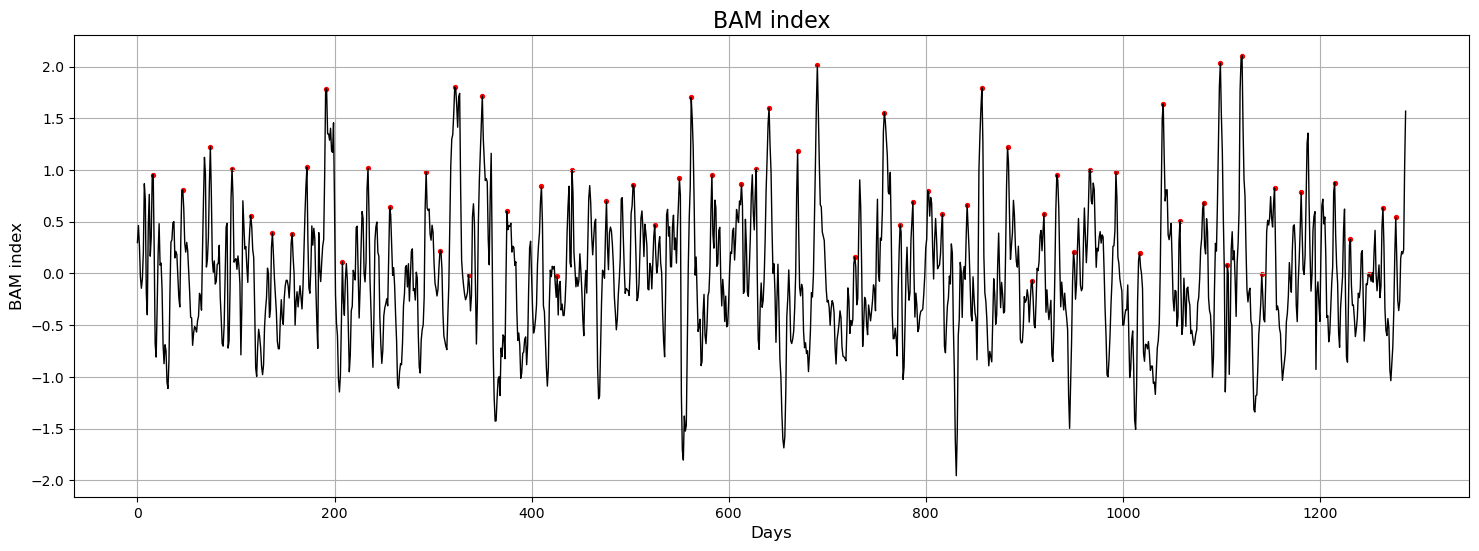

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


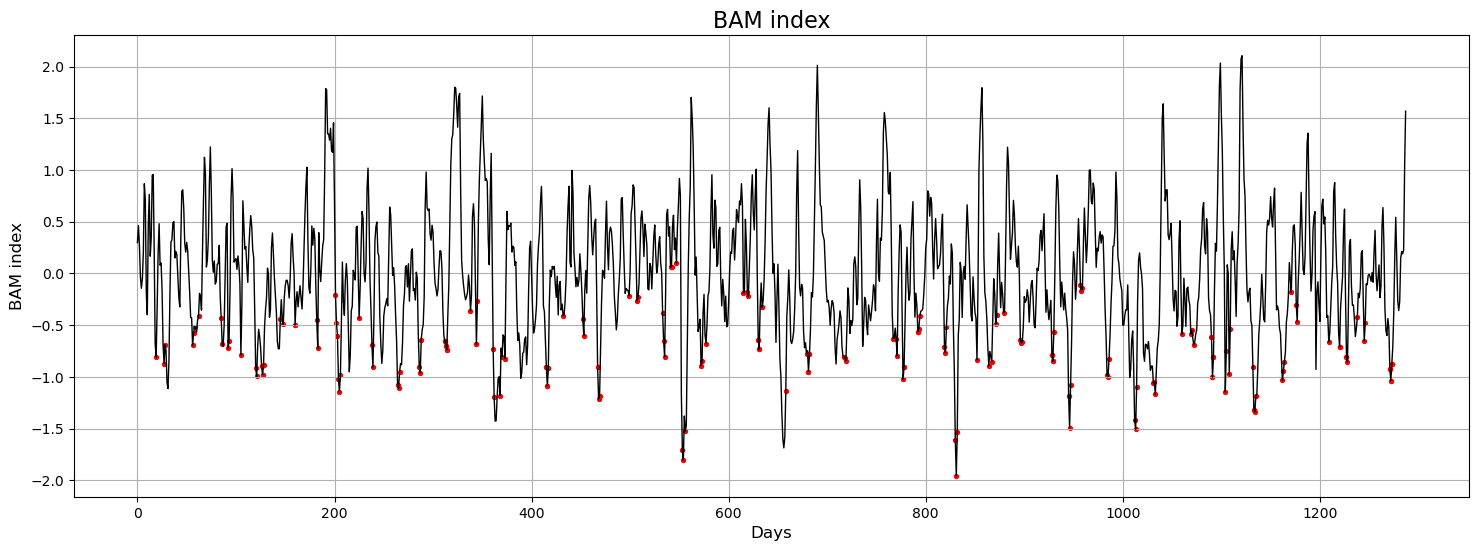

In [6]:
# ALL DAYS
with open('/scratch/negishi/zholder/NBAM_all.pkl','rb') as p:
    NBAMi = pickle.load(p)
with open('/scratch/negishi/zholder/NBAM_pac_all.pkl','rb') as p:
    NBAMi_pac = pickle.load(p)

# Create a list to hold the values for the years 2003 to 2010
filtered_values_jja = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if s_dict[s_list_jja][0] <= date.month <= s_dict[s_list_jja][-1]:
            filtered_values_jja.append(value)
st_filtered_values_jja = [((i - np.mean(filtered_values_jja))/np.std(filtered_values_jja)) for i in filtered_values_jja] 

bam_array_jja = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if 1 <= date.month <= 12:
            bam_array_jja.append(value)

#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import copy
import xarray as xr

# Time management
start_date = "2004-01-01"
end_date = "2017-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

# Get JJA
jja_index_jja = np.where(dates.month.isin(s_dict[s_list_jja]))[0]
Date_JJA_jja = dates[jja_index_jja]

print('Total JJA days: '+str(len(Date_JJA_jja))) 
print('Date_JJA[0:2]: '+str(Date_JJA_jja[0:2]))

# BAM index
# BI = np.load('../../output/NBAM_index_synoptic_no_leap.npy') # 1940 to 2023
BI_jja = np.array([i for i in bam_array_jja])
BI_JJA_jja = BI[jja_index_jja]

print('BI shape: '+str(BI_jja.shape))
print('BI JJA shape: '+str(BI_JJA_jja.shape))

n_season = 14                        ### no. of season
# season_day= 92
season_day= sd_dict[s_list_jja]                      ### no. of days in one season
season_all = n_season*season_day     ### no. of days in all seasons

BI_copy_jja = copy.copy(BI_jja)
BAM_event_all_jja = []      # BAM peaks  
BAM_event_BI_all_jja = []   # The value of the BI at that peaking date
number = 0
while 1:
    # index = np.squeeze(np.array(np.where( BI_copy==np.nanmax(BI_copy) )))[0]
    index = np.nanargmax(BI_copy_jja)
#    index: An integer representing the position of the maximum value in BI_copy at each iteration.
    if BI_jja[index]>=BI_jja[index+1] and BI_jja[index]>=BI_jja[index-1] and BI_jja[index]>=BI_jja[index+2] and BI_jja[index]>=BI_jja[index-2]:   # 5 consecutive days        
        BAM_event_all_jja.append(index)
        BAM_event_BI_all_jja.append(BI_jja[index])
        number+=1
        BI_copy_jja[index-12:index+13] = np.nan
        if number > 999:     #  1000 peaks selected 
            break
    else:
        BI_copy_jja[index]=np.nan
        
print('BAM_event_all shape: '+str(len(BAM_event_all_jja)))

# extract BAM event in JJA
BAM_event_JJA_jja = []
BAM_event_date_JJA_jja = [] 
for i in range(len(BAM_event_all_jja)):
    if Month[BAM_event_all_jja[i]] in s_dict[s_list_jja]:
        BAM_event_JJA_jja.append(BAM_event_all_jja[i])
        BAM_event_date_JJA_jja.append(dates[BAM_event_all_jja[i]])
        print(Month[BAM_event_all_jja[i]])
        print(dates[BAM_event_all_jja[i]])

# index in the Date_JJA time series ###
BAM_event_jja = []
BAM_event_BI_jja = []
for i in np.arange(len(BAM_event_JJA_jja)):
    t = np.where(np.array(Date_JJA_jja) == BAM_event_date_JJA_jja[i])[0][0]
    BAM_event_jja.append(t)
    BAM_event_BI_jja.append(BI_JJA_jja[t])   # .append(BAM_event_JJA[i])
    print('check '+ str(BI_JJA_jja[t]) +', '+str(BAM_event_JJA_jja[i]) )

print('BAM_event_JJA size: '+str(len(BAM_event_JJA_jja)))
print('BAM_event size: '+str(len(BAM_event_jja)))

# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA_jja[:], '-k', linewidth=1)
plt.scatter(BAM_event_jja, BI_JJA_jja[BAM_event_jja], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

BAM_event_jja = list(BAM_event_jja)
BAM_event_BI_jja = list(BAM_event_BI_jja)

print('95 percentile is '+str(np.percentile(BAM_event_BI_jja,95)))
print('80 percentile is '+str(np.percentile(BAM_event_BI_jja,80)))
print('70 percentile is '+str(np.percentile(BAM_event_BI_jja,70)))
print('60 percentile is '+str(np.percentile(BAM_event_BI_jja,60)))
print('50 percentile is '+str(np.percentile(BAM_event_BI_jja,50)))
print('Minimum BAM index is '+str(np.min(BAM_event_BI_jja)))

# High and low BAM state
T=1
n_BAM_jja = len(BAM_event_JJA_jja)
HBAM_jja = np.zeros((n_BAM_jja,2*T+1))  # to store the date index of high BAM state
LBAM_jja = np.zeros((n_BAM_jja,2*T+1))  # to store the date index of low BAM state
for i in np.arange(n_BAM_jja):
    #HBAM[i,:] = np.arange(BAM_event_JJA[i]-T,BAM_event_JJA[i]+T+1) # index in the entire duration
    HBAM_jja[i,:] = np.arange(BAM_event_jja[i]-T,BAM_event_jja[i]+T+1)  # index in the JJA time series

for i in np.arange(n_BAM_jja):
    index = BAM_event_jja[i]
    if index%season_day-12<0:        
        BI_event_jja = copy.copy(BI_JJA_jja[index-(index%season_day):index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event_jja==np.nanmin(BI_event_jja) ))[0])
            print(index1)
            LBAM_jja[i,d] = index-(index%season_day)+index1
            BI_event_jja[index1] = np.nan
    elif index%season_day+12>season_day:
        BI_event_jja = copy.copy(BI_JJA_jja[index-12: index+(season_day-(index%season_day))])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event_jja==np.nanmin(BI_event_jja) ))[0])
            LBAM_jja[i,d] = index-12+index1
            BI_event_jja[index1] = np.nan
    else:
        BI_event_jja = copy.copy(BI_JJA_jja[index-12:index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event_jja==np.nanmin(BI_event_jja) ))[0])
            LBAM_jja[i,d] = index-12+index1
            BI_event_jja[index1] = np.nan

# np.savetxt('../../output/JJA/high_BAM_state_date_index_in_JJA.dat', HBAM, fmt='%f', delimiter=' ')
# np.savetxt('../../output/JJA/low_BAM_state_date_index_in_JJA.dat', LBAM, fmt='%f', delimiter=' ')

HI_jja = HBAM_jja[:,1].astype(int)
LI_jja = LBAM_jja.reshape(-1)
LI_jja = LI_jja.astype(int)
print(HI_jja)
# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA_jja[:], '-k', linewidth=1)
plt.scatter(HI_jja, BI_JJA_jja[HI_jja], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
ax.grid()
plt.show()
N = 300
# plot to check whether we get the correct BAM minimum date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA_jja[:], '-k', linewidth=1)
plt.scatter(LI_jja, BI_JJA_jja[LI_jja], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
# plt.xlim(0,300)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

LI_jja.sort()
HI_jja.sort()



---

# Load high and low days

In [7]:
pos_BI_dates = [i for i in date_list[HI]]
neg_BI_dates = [pd.Timestamp(i) for i in np.unique(date_list[LI])]
pm1 = [i - np.timedelta64(1, 'D') for i in pos_BI_dates if i.month in s_dict[s_list]]

pos_BI_dates_jja = [i for i in date_list_jja[HI_jja]]
neg_BI_dates_jja = [pd.Timestamp(i) for i in np.unique(date_list_jja[LI_jja])]
pm1_jja = [i - np.timedelta64(1, 'D') for i in pos_BI_dates_jja if i.month in s_dict[s_list_jja]]

print(f'{len(pos_BI_dates)} Peak days')
print(f'{len(neg_BI_dates)} Low State days')
print(f'{len(pm1)} Peak - 1')

print(f'{len(pos_BI_dates_jja)} Peak days')
print(f'{len(neg_BI_dates_jja)} Low State days')
print(f'{len(pm1_jja)} Peak - 1')

68 Peak days
164 Low State days
68 Peak - 1
62 Peak days
158 Low State days
62 Peak - 1


In [8]:
all_pos_jja = sorted(set(pm1_jja + pos_BI_dates_jja))
all_pos = sorted(set(pm1 + pos_BI_dates))

print(f'{len(all_pos_jja)} all_pos_jja')
print(f'{len(all_pos)} all_pos_mam')

124 all_pos_jja
136 all_pos_mam


# Load ETC

In [9]:
ds = xr.load_dataset('/scratch/negishi/zholder/ETC_TRACKS.nc')

---
# PDF ETC

In [15]:
latmin_b = 30
latmax_b = 50
lonmin_b = -105
lonmax_b = -80

neg_BI_dates
neg_BI_dates_jja

all_pos
all_pos_jja


[Timestamp('2004-06-16 00:00:00'),
 Timestamp('2004-06-17 00:00:00'),
 Timestamp('2004-07-16 00:00:00'),
 Timestamp('2004-07-17 00:00:00'),
 Timestamp('2004-08-13 00:00:00'),
 Timestamp('2004-08-14 00:00:00'),
 Timestamp('2005-06-04 00:00:00'),
 Timestamp('2005-06-05 00:00:00'),
 Timestamp('2005-06-23 00:00:00'),
 Timestamp('2005-06-24 00:00:00'),
 Timestamp('2005-07-15 00:00:00'),
 Timestamp('2005-07-16 00:00:00'),
 Timestamp('2005-08-04 00:00:00'),
 Timestamp('2005-08-05 00:00:00'),
 Timestamp('2005-08-19 00:00:00'),
 Timestamp('2005-08-20 00:00:00'),
 Timestamp('2006-06-07 00:00:00'),
 Timestamp('2006-06-08 00:00:00'),
 Timestamp('2006-06-24 00:00:00'),
 Timestamp('2006-06-25 00:00:00'),
 Timestamp('2006-07-20 00:00:00'),
 Timestamp('2006-07-21 00:00:00'),
 Timestamp('2006-08-11 00:00:00'),
 Timestamp('2006-08-12 00:00:00'),
 Timestamp('2007-06-17 00:00:00'),
 Timestamp('2007-06-18 00:00:00'),
 Timestamp('2007-07-01 00:00:00'),
 Timestamp('2007-07-02 00:00:00'),
 Timestamp('2007-07-

In [28]:
def compute_pdf(ds, date_subset, latmin, latmax, lonmin, lonmax, bins=50):
    lat = ds['lat'].values
    lon = ds['lon'].values
    time = ds['time'].values
    
    # Flatten
    lat_flat = lat.flatten()
    lon_flat = lon.flatten()
    time_flat = time.flatten()

    # Convert times to date-only
    time_flat_dates = time_flat.astype('datetime64[D]')
    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Create masks
    mask_date = np.isin(time_flat_dates, date_subset)
    mask_latlon = (lat_flat >= latmin) & (lat_flat <= latmax) & \
                  (lon_flat >= lonmin) & (lon_flat <= lonmax)
    valid_mask = mask_date & mask_latlon

    print(f"→ Total points: {lat_flat.size}")
    print(f"→ Points in date subset: {np.sum(mask_date)}")
    print(f"→ Points in lat/lon box: {np.sum(mask_latlon)}")
    print(f"→ Points matching both: {np.sum(valid_mask)}")

    lat_valid = lat_flat[valid_mask]
    lon_valid = lon_flat[valid_mask]

    if len(lat_valid) == 0:
        print("⚠️ No valid data points found for this subset.")
        return np.full((bins, bins), np.nan), None, None

    hist, xedges, yedges = np.histogram2d(
        lat_valid, lon_valid,
        bins=bins,
        range=[[latmin, latmax], [lonmin, lonmax]],
        density=True
    )

    return hist.T, xedges, yedges


In [29]:
pdf_neg_BI, x1, y1 = compute_pdf(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)


→ Total points: 8286906
→ Points in date subset: 12082
→ Points in lat/lon box: 116742
→ Points matching both: 1604


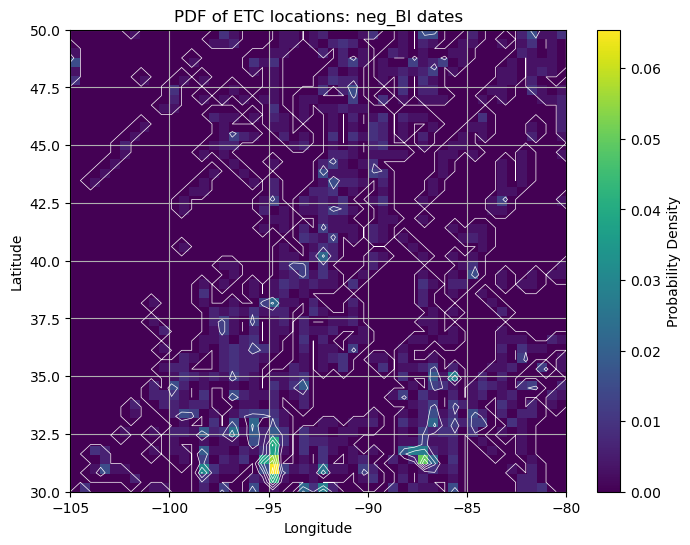

In [33]:
plt.figure(figsize=(8, 6))
im = plt.imshow(pdf_neg_BI, origin='lower', aspect='auto',
                extent=[lonmin_b, lonmax_b, latmin_b, latmax_b],
                cmap='viridis')
plt.contour(np.linspace(lonmin_b, lonmax_b, pdf_neg_BI.shape[1]),
            np.linspace(latmin_b, latmax_b, pdf_neg_BI.shape[0]),
            pdf_neg_BI, colors='white', linewidths=0.5)

plt.colorbar(im, label='Probability Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PDF of ETC locations: neg_BI dates')
plt.grid(True)
plt.show()


In [34]:
pdf_all_pos, x3, y3 = compute_pdf(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)


→ Total points: 8286906
→ Points in date subset: 10743
→ Points in lat/lon box: 116742
→ Points matching both: 1653


In [38]:
def compute_pdf_per_day(ds, date_subset, latmin, latmax, lonmin, lonmax, bins=50):
    lat = ds['lat'].values
    lon = ds['lon'].values
    time = ds['time'].values

    # Flatten
    lat_flat = lat.flatten()
    lon_flat = lon.flatten()
    time_flat = time.flatten().astype('datetime64[D]')
    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Create masks
    mask_date = np.isin(time_flat, date_subset)
    mask_latlon = (lat_flat >= latmin) & (lat_flat <= latmax) & \
                  (lon_flat >= lonmin) & (lon_flat <= lonmax)
    valid_mask = mask_date & mask_latlon

    lat_valid = lat_flat[valid_mask]
    lon_valid = lon_flat[valid_mask]

    if len(lat_valid) == 0:
        print("⚠️ No valid data points found.")
        return np.full((bins, bins), np.nan), None, None

    # Count number of unique days in date subset that exist in ds
    ds_dates = np.unique(time_flat[mask_date])
    n_days = len(ds_dates)
    print(f"📆 Normalizing over {n_days} days")

    # Build histogram and normalize per day
    hist, xedges, yedges = np.histogram2d(
        lat_valid, lon_valid,
        bins=bins,
        range=[[latmin, latmax], [lonmin, lonmax]],
        density=False  # Turn off density first
    )

    hist = hist / n_days  # Normalize per day

    return hist.T, xedges, yedges  # Transpose for imshow


In [77]:
pdf_all_pos, x3, y3 = compute_pdf_per_day(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)


📆 Normalizing over 135 days


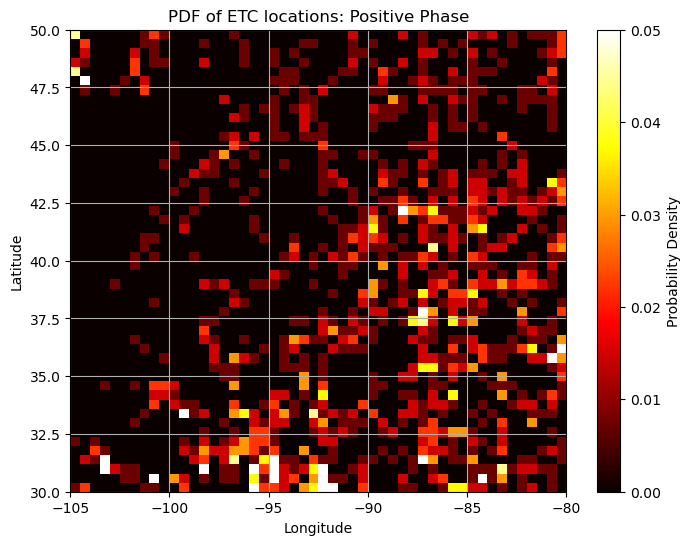

In [79]:
plt.figure(figsize=(8, 6))
vmin = 0      # or min value across all PDFs if comparing multiple
vmax = 0.05   # example max; adjust based on your actual data
levels = np.linspace(vmin, vmax, 10)

im = plt.imshow(pdf_all_pos, origin='lower', aspect='auto',
                extent=[lonmin_b, lonmax_b, latmin_b, latmax_b],
                cmap='hot',vmin=vmin,vmax=vmax)
# plt.contour(np.linspace(lonmin_b, lonmax_b, pdf_all_pos.shape[1]),
#             np.linspace(latmin_b, latmax_b, pdf_all_pos.shape[0]),
#             pdf_all_pos, colors='white', linewidths=0.5,levels=levels)

plt.colorbar(im, label='Probability Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PDF of ETC locations: Positive Phase')
plt.grid(True)
plt.show()


In [75]:
pdf_neg_BI, x1, y1 = compute_pdf_per_day(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)


📆 Normalizing over 163 days


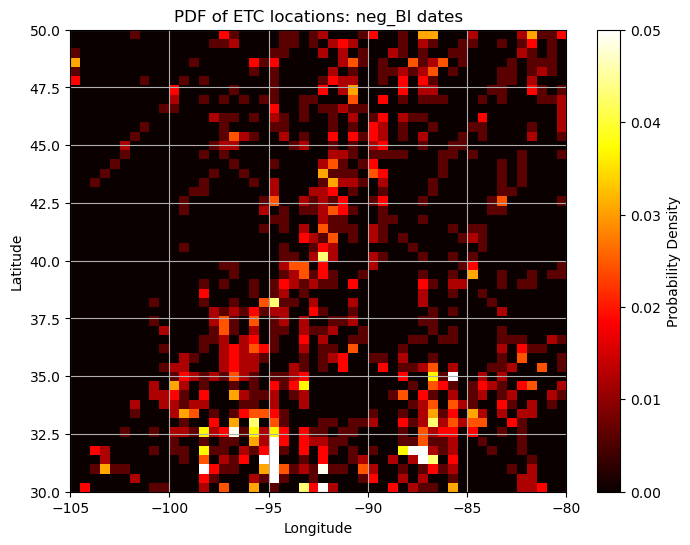

In [76]:
plt.figure(figsize=(8, 6))
vmin = 0      # or min value across all PDFs if comparing multiple
vmax = 0.05   # example max; adjust based on your actual data
levels = np.linspace(vmin, vmax, 10)

im = plt.imshow(pdf_neg_BI, origin='lower', aspect='auto',
                extent=[lonmin_b, lonmax_b, latmin_b, latmax_b],
                cmap='hot',vmin=vmin,vmax=vmax)
# plt.contour(np.linspace(lonmin_b, lonmax_b, pdf_neg_BI.shape[1]),
#             np.linspace(latmin_b, latmax_b, pdf_neg_BI.shape[0]),
#             pdf_neg_BI, colors='white', linewidths=0.5,levels=levels)

plt.colorbar(im, label='Probability Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PDF of ETC locations: neg_BI dates')
plt.grid(True)
plt.show()


In [93]:
def extract_valid_latlon(ds, date_subset, latmin, latmax, lonmin, lonmax):
    lat = ds['lat'].values.flatten()
    lon = ds['lon'].values.flatten()
    time = ds['time'].values.flatten().astype('datetime64[D]')
    track = ds['track'].values.flatten()

    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Apply date and spatial masks
    mask_date = np.isin(time, date_subset)
    mask_box = (lat >= latmin) & (lat <= latmax) & \
               (lon >= lonmin) & (lon <= lonmax)
    valid_mask = mask_date & mask_box

    return lon[valid_mask], lat[valid_mask], track[valid_mask]

# Extract valid lon/lat/track for each phase
lon_neg_BI, lat_neg_BI, track_neg_BI = extract_valid_latlon(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)
lon_all_pos, lat_all_pos, track_all_pos = extract_valid_latlon(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)

# Count unique tracks
num_unique_neg_BI = len(np.unique(track_neg_BI))
num_unique_pos_BI = len(np.unique(track_all_pos))

# Print results
print("Number of unique ETC tracks in negative BI phase:", num_unique_neg_BI)
print("Number of unique ETC tracks in positive BI phase:", num_unique_pos_BI)


IndexError: boolean index did not match indexed array along axis 0; size of axis is 8882 but size of corresponding boolean axis is 8286906

In [53]:
def extract_valid_latlon(ds, date_subset, latmin, latmax, lonmin, lonmax):
    lat = ds['lat'].values.flatten()
    lon = ds['lon'].values.flatten()
    time = ds['time'].values.flatten().astype('datetime64[D]')
    date_subset = np.array(date_subset).astype('datetime64[D]')

    # Masks
    mask_date = np.isin(time, date_subset)
    mask_box = (lat >= latmin) & (lat <= latmax) & \
               (lon >= lonmin) & (lon <= lonmax)
    valid_mask = mask_date & mask_box

    return lon[valid_mask], lat[valid_mask]


lon_neg_BI, lat_neg_BI = extract_valid_latlon(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)
lon_all_pos, lat_all_pos = extract_valid_latlon(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)


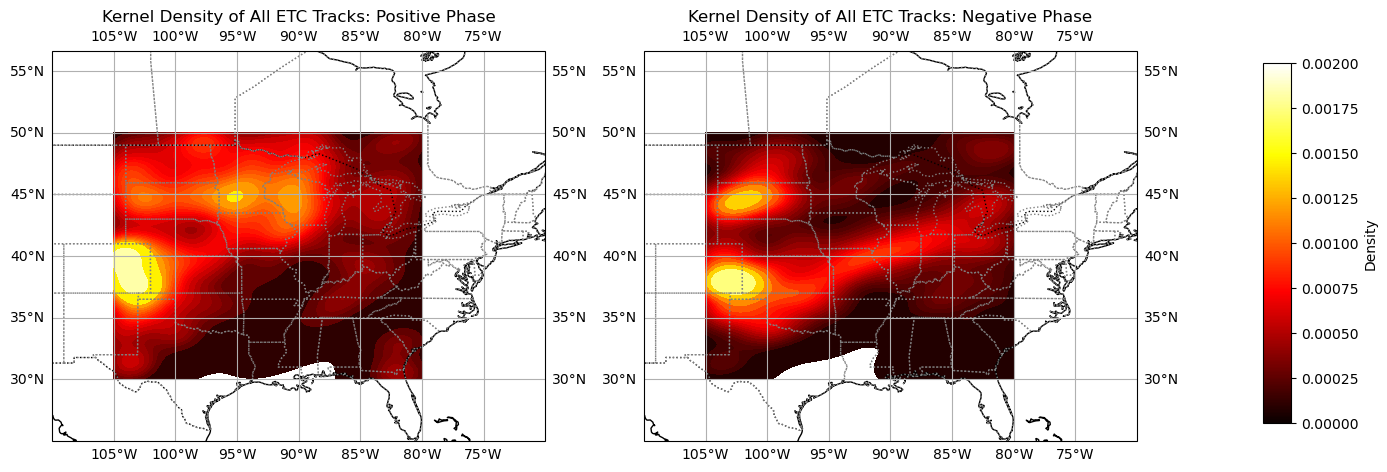

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

subsets = [
    ("Positive Phase", lon_all_pos, lat_all_pos),
    ("Negative Phase", lon_neg_BI, lat_neg_BI)
    
]

for ax, (title, lon_pts, lat_pts) in zip(axs, subsets):
    ax.set_extent([lonmin_b, lonmax_b, latmin_b, latmax_b], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
    ax.gridlines(draw_labels=True)

    # Plot KDE if we have points
    if len(lon_pts) > 0:
        sns.kdeplot(
            x=lon_pts, y=lat_pts,
            ax=ax,
            fill=True,
            cmap="hot",
            bw_adjust=0.7,
            levels=20,
            thresh=0.0001,
            clip=((lonmin_b, lonmax_b), (latmin_b, latmax_b)),
        )
    else:
        ax.set_title(f"{title}: No data in box")
        continue

    ax.set_title(f"Kernel Density of All ETC Tracks: {title}")
    ax.set_extent([-110, lonmax_b+10, 25, 55])
# plt.tight_layout()
cbar_ax = fig.add_axes([0.99, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="hot", norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Density")
plt.show()


In [17]:
pdf_neg_BI, x1, y1 = compute_pdf(ds, neg_BI_dates, latmin_b, latmax_b, lonmin_b, lonmax_b)
pdf_neg_BI_jja, x2, y2 = compute_pdf(ds, neg_BI_dates_jja, latmin_b, latmax_b, lonmin_b, lonmax_b)
pdf_all_pos, x3, y3 = compute_pdf(ds, all_pos, latmin_b, latmax_b, lonmin_b, lonmax_b)
pdf_all_pos_jja, x4, y4 = compute_pdf(ds, all_pos_jja, latmin_b, latmax_b, lonmin_b, lonmax_b)


/home/zholder/.conda/envs/2024.02-py311/env24/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:1086: RuntimeWarning: invalid value encountered in divide
  hist /= s


KeyboardInterrupt: 

---

# LOAD MCS

In [10]:
import os
import glob
import xarray as xr
import numpy as np

path = '/scratch/negishi/zholder/MCS_NEX_v3/US_MCS_Dataset_V3/'
files = glob.glob(os.path.join(path, 'mcs_tracks_final_extc_*.nc'))
files.sort()

# US bounds
# latmin_b = 20
# latmax_b = 70
# lonmin_b = -180
# lonmax_b = -50
# You and Deng
latmin_b = 30
latmax_b = 50
lonmin_b = -105
lonmax_b = -80
jja = []

for count, f in enumerate(files, 1):
    dss = xr.open_dataset(f)

    # Track indices for JJA months
    ids = []
    base_times = dss.isel(times=0).base_time.values

    for idx, t in enumerate(dss.isel(times=0).base_time.values):
        dt = np.datetime64(t, 'M')  # Convert to year-month format
        year = int(str(dt)[:4])
        month = int(str(dt)[5:7])

        if 2004 <= year <= 2017 and month in s_dict[s_list]:
            ids.append(idx)
            
    if not ids:
        print(f"File {count}: No MAM tracks.")
        continue

    tracks_jja = dss.sel(tracks=ids)

    meanlat = tracks_jja.isel(times=0).meanlat.values
    meanlon = tracks_jja.isel(times=0).meanlon.values

    indices_with_valid_conditions = []
    for i in range(len(meanlat)):
        if latmin_b <= meanlat[i] <= latmax_b and lonmin_b <= meanlon[i] <= lonmax_b:
            indices_with_valid_conditions.append(i)

    if indices_with_valid_conditions:
        valid_track_ids = tracks_jja.tracks[indices_with_valid_conditions].values
        jja.append(tracks_jja.sel(tracks=valid_track_ids))
        print(f"File {count}: Added {len(valid_track_ids)} tracks.")
    else:
        print(f"File {count}: No tracks within lat/lon bounds.")
    
dsobs = xr.concat(jja,dim='tracks')
print(f'Total tracks: {len(dsobs.tracks)}')
px = dsobs.attrs['pixel_radius_km']

File 1: Added 76 tracks.
File 2: Added 61 tracks.
File 3: Added 82 tracks.
File 4: Added 72 tracks.
File 5: Added 74 tracks.
File 6: Added 70 tracks.
File 7: Added 81 tracks.
File 8: Added 86 tracks.
File 9: Added 75 tracks.
File 10: Added 76 tracks.
File 11: Added 48 tracks.
File 12: Added 77 tracks.
File 13: Added 90 tracks.
File 14: Added 81 tracks.
File 15: No MAM tracks.
File 16: No MAM tracks.
File 17: No MAM tracks.
Total tracks: 1049


In [11]:
import os
import glob
import xarray as xr
import numpy as np

path = '/scratch/negishi/zholder/MCS_NEX_v3/US_MCS_Dataset_V3/'
files = glob.glob(os.path.join(path, 'mcs_tracks_final_extc_*.nc'))
files.sort()

# US bounds
# latmin_b = 20
# latmax_b = 70
# lonmin_b = -180
# lonmax_b = -50
# You and Deng
latmin_b = 30
latmax_b = 50
lonmin_b = -105
lonmax_b = -80
jja = []

for count, f in enumerate(files, 1):
    dss = xr.open_dataset(f)

    # Track indices for JJA months
    ids = []
    base_times = dss.isel(times=0).base_time.values

    for idx, t in enumerate(dss.isel(times=0).base_time.values):
        dt = np.datetime64(t, 'M')  # Convert to year-month format
        year = int(str(dt)[:4])
        month = int(str(dt)[5:7])

        if 2004 <= year <= 2017 and month in s_dict[s_list_jja]:
            ids.append(idx)
            
    if not ids:
        print(f"File {count}: No MAM tracks.")
        continue

    tracks_jja = dss.sel(tracks=ids)

    meanlat = tracks_jja.isel(times=0).meanlat.values
    meanlon = tracks_jja.isel(times=0).meanlon.values

    indices_with_valid_conditions = []
    for i in range(len(meanlat)):
        if latmin_b <= meanlat[i] <= latmax_b and lonmin_b <= meanlon[i] <= lonmax_b:
            indices_with_valid_conditions.append(i)

    if indices_with_valid_conditions:
        valid_track_ids = tracks_jja.tracks[indices_with_valid_conditions].values
        jja.append(tracks_jja.sel(tracks=valid_track_ids))
        print(f"File {count}: Added {len(valid_track_ids)} tracks.")
    else:
        print(f"File {count}: No tracks within lat/lon bounds.")
    
dsobs_jja = xr.concat(jja,dim='tracks')
print(f'Total tracks: {len(dsobs.tracks)}')
px = dsobs.attrs['pixel_radius_km']

File 1: Added 158 tracks.
File 2: Added 115 tracks.
File 3: Added 130 tracks.
File 4: Added 124 tracks.
File 5: Added 154 tracks.
File 6: Added 144 tracks.
File 7: Added 119 tracks.
File 8: Added 149 tracks.
File 9: Added 99 tracks.
File 10: Added 138 tracks.
File 11: Added 135 tracks.
File 12: Added 136 tracks.
File 13: Added 151 tracks.
File 14: Added 138 tracks.
File 15: No MAM tracks.
File 16: No MAM tracks.
File 17: No MAM tracks.
Total tracks: 1049


# Relabel tracks

In [12]:
# Get the total number of tracks across all datasets
total_tracks = dsobs.dims['tracks']
# Create a new array with sequential track numbers
new_track_numbers = np.arange(total_tracks)
# Assign the new track numbers to the 'tracks' dimension
dsobs['tracks'] = ('tracks', new_track_numbers)

# Get the total number of tracks across all datasets
total_tracks_jja = dsobs_jja.dims['tracks']
# Create a new array with sequential track numbers
new_track_numbers_jja = np.arange(total_tracks_jja)
# Assign the new track numbers to the 'tracks' dimension
dsobs_jja['tracks'] = ('tracks', new_track_numbers_jja)

/tmp/ipykernel_1153484/818980208.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  total_tracks = dsobs.dims['tracks']
/tmp/ipykernel_1153484/818980208.py:9: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  total_tracks_jja = dsobs_jja.dims['tracks']


# Collocate first 6

/tmp/ipykernel_1153484/2107962889.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['delta_lat'] = results['lat_mcs'] - results['lat_etc']
/tmp/ipykernel_1153484/2107962889.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['delta_lon'] = results['lon_mcs'] - results['lon_etc']
/tmp/ipykernel_1153484/2107962889.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

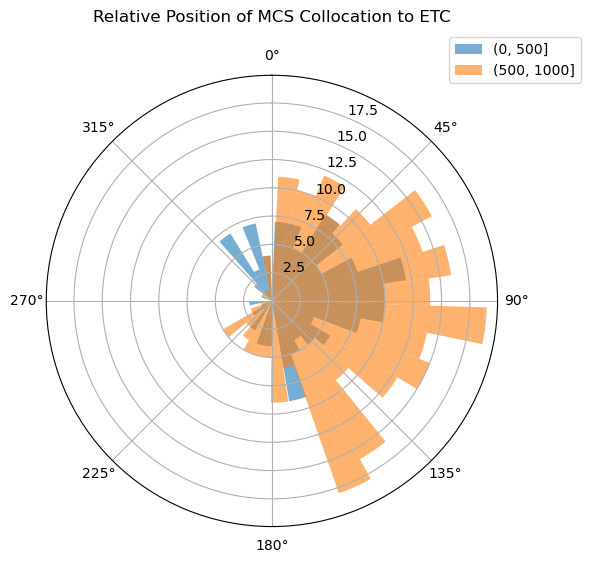

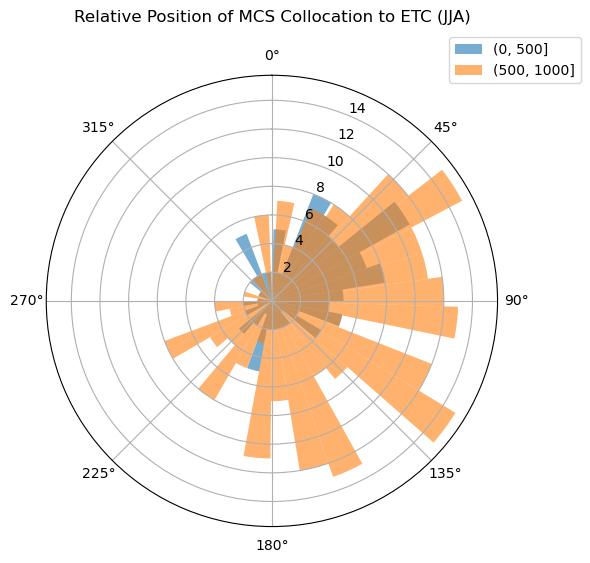

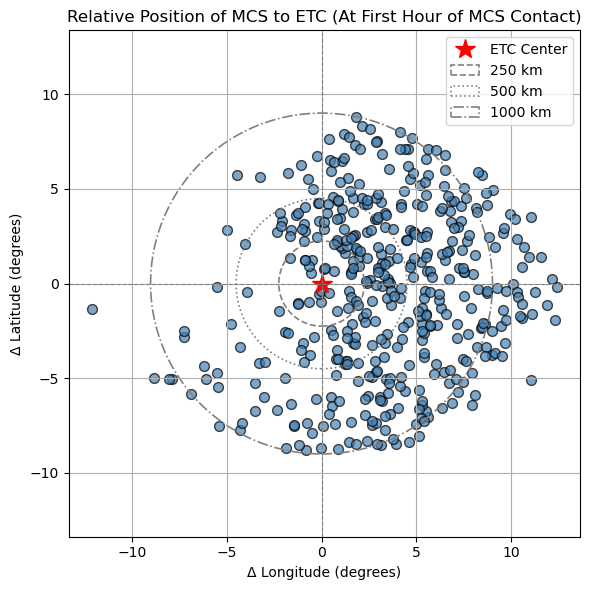

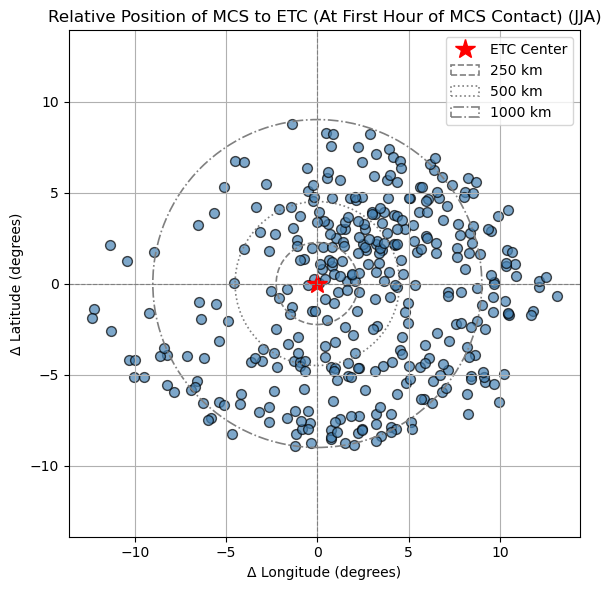

In [13]:
dsobs_init = dsobs.isel(times = dsobs.times.isin([0,1,2,3,4,5]))
dsobs_init_jja = dsobs_jja.isel(times = dsobs_jja.times.isin([0,1,2,3,4,5]))

import xarray as xr
import numpy as np
import pandas as pd
from haversine import haversine, Unit

# Extract relevant variables
etc_lat = ds['lat']  # shape: (track, time_step)
etc_lon = ds['lon']
etc_time = ds['time']  # shape: (track, time_step)

mcs_lat = dsobs_init['meanlat']  # shape: (tracks, times)
mcs_lon = dsobs_init['meanlon']
mcs_time = dsobs_init['base_time']  # shape: (tracks, times)

mcs_lat_jja = dsobs_init_jja['meanlat']  # shape: (tracks, times)
mcs_lon_jja = dsobs_init_jja['meanlon']
mcs_time_jja = dsobs_init_jja['base_time']  # shape: (tracks, times)

# Flatten the data for vectorized processing
etc_flat = xr.Dataset({
    'lat': etc_lat.stack(all_points=('track', 'time_step')),
    'lon': etc_lon.stack(all_points=('track', 'time_step')),
    'time': etc_time.stack(all_points=('track', 'time_step')),
})

mcs_flat = xr.Dataset({
    'lat': mcs_lat.stack(all_points=('tracks', 'times')),
    'lon': mcs_lon.stack(all_points=('tracks', 'times')),
    'time': mcs_time.stack(all_points=('tracks', 'times')),
})

mcs_flat_jja = xr.Dataset({
    'lat': mcs_lat_jja.stack(all_points=('tracks', 'times')),
    'lon': mcs_lon_jja.stack(all_points=('tracks', 'times')),
    'time': mcs_time_jja.stack(all_points=('tracks', 'times')),
})


etc_df = etc_flat.to_dataframe().dropna()

mcs_df = mcs_flat.to_dataframe().dropna()

mcs_df_jja = mcs_flat_jja.to_dataframe().dropna()

# Merge on matching times (or within a time window, e.g., +/- 1 hour)
time_tolerance = np.timedelta64(0, 'h')  # or '1h', '15m' if needed
merged = pd.merge(etc_df, mcs_df, on='time', suffixes=('_etc', '_mcs'))

merged_jja = pd.merge(etc_df, mcs_df_jja, on='time', suffixes=('_etc', '_mcs'))

# Compute distances (vectorized haversine)
def compute_distance(row):
    return haversine((row['lat_etc'], row['lon_etc']), (row['lat_mcs'], row['lon_mcs']), unit=Unit.KILOMETERS)

merged['distance_km'] = merged.apply(compute_distance, axis=1)
merged_jja['distance_km'] = merged_jja.apply(compute_distance, axis=1)

thresh_dist = 1000 # UPDATE
# Filter for distances under 1000 km
within_radius = merged[merged['distance_km'] <= thresh_dist]
within_radius_jja = merged_jja[merged_jja['distance_km'] <= thresh_dist]

# Result: list of matching tracks and time indices
results = within_radius[['track', 'time_step', 'tracks', 'times', 'time',
                         'lat_etc', 'lon_etc', 'lat_mcs', 'lon_mcs', 'distance_km']]
results_jja = within_radius_jja[['track', 'time_step', 'tracks', 'times', 'time',
                         'lat_etc', 'lon_etc', 'lat_mcs', 'lon_mcs', 'distance_km']]
# results = within_radius[['track', 'time_step', 'tracks', 'times', 'time', 'distance_km']]
results['delta_lat'] = results['lat_mcs'] - results['lat_etc']
results['delta_lon'] = results['lon_mcs'] - results['lon_etc']

results_jja['delta_lat'] = results_jja['lat_mcs'] - results_jja['lat_etc']
results_jja['delta_lon'] = results_jja['lon_mcs'] - results_jja['lon_etc']
# 1. Convert the slp DataArray to a DataFrame
slp_df = ds['slp'].to_dataframe().reset_index()  # ensures 'track' and 'time_step' are columns
slp_df_jja = ds['slp'].to_dataframe().reset_index()  # ensures 'track' and 'time_step' are columns
# 2. Merge with the original df
df_with_slp = results.merge(slp_df, on=['track', 'time_step'], how='left')
df_with_slp_jja = results_jja.merge(slp_df_jja, on=['track', 'time_step'], how='left')

results = df_with_slp.copy()
results_jja = df_with_slp_jja.copy()

# Keep only the closest ETC per unique MCS (based on 'tracks' and 'times')
results = results.sort_values('distance_km')  # Sort so closest is first
results = results.drop_duplicates(subset=['tracks', 'times'], keep='first')
results = results.sort_values('times').drop_duplicates(subset='tracks', keep='first').reset_index(drop=True)

results_jja = results_jja.sort_values('distance_km')  # Sort so closest is first
results_jja = results_jja.drop_duplicates(subset=['tracks', 'times'], keep='first')
results_jja = results_jja.sort_values('times').drop_duplicates(subset='tracks', keep='first').reset_index(drop=True)
###################################################################################################
######## COMPUTE RELATIVE DISTANCE ############

# Compute angle in radians from ETC to MCS
results['theta_rad'] = np.arctan2(results['delta_lon'], results['delta_lat'])

# Convert to degrees (0° = North, 90° = East, etc.)
results['theta_deg'] = np.degrees(results['theta_rad']) % 360
# Create distance bins
distance_bins = np.arange(0, 2500, 500)
results['distance_bin'] = pd.cut(results['distance_km'], bins=distance_bins)

# Compute angle in radians from ETC to MCS
results_jja['theta_rad'] = np.arctan2(results_jja['delta_lon'], results_jja['delta_lat'])
# Convert to degrees (0° = North, 90° = East, etc.)
results_jja['theta_deg'] = np.degrees(results_jja['theta_rad']) % 360
# Create distance bins
distance_bins_jja = np.arange(0, 2500, 500)
results_jja['distance_bin'] = pd.cut(results_jja['distance_km'], bins=distance_bins_jja)

######### WIND ROSE ##############

# Setup figure
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Loop through distance bins and plot direction histograms
for i, bin_label in enumerate(results['distance_bin'].cat.categories):
    subset = results[results['distance_bin'] == bin_label]
    if subset.empty:
        continue
    # Plot polar histogram: angle in radians
    ax.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

# Format plot
ax.set_theta_zero_location('N')  # 0° at the top
ax.set_theta_direction(-1)       # Clockwise direction

plt.title('Relative Position of MCS Collocation to ETC', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

##JJA##
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Loop through distance bins and plot direction histograms
for i, bin_label in enumerate(results_jja['distance_bin'].cat.categories):
    subset_jja = results_jja[results_jja['distance_bin'] == bin_label]
    if subset_jja.empty:
        continue
    # Plot polar histogram: angle in radians
    ax.hist(np.radians(subset_jja['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

# Format plot
ax.set_theta_zero_location('N')  # 0° at the top
ax.set_theta_direction(-1)       # Clockwise direction

plt.title('Relative Position of MCS Collocation to ETC (JJA)', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()



plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(results['delta_lon'], results['delta_lat'],
            color='steelblue', s=50, edgecolor='k', alpha=0.7)

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

if thresh_dist == 1000:
# Add concentric rings (in degrees, approx.)
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0  # approximate conversion
        ring = plt.Circle((0, 0), radius_deg, color='gray',
                        fill=False, linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Plot settings
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Relative Position of MCS to ETC (At First Hour of MCS Contact)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio square
plt.tight_layout()
plt.show()

### JJA ###
plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(results_jja['delta_lon'], results_jja['delta_lat'],
            color='steelblue', s=50, edgecolor='k', alpha=0.7)

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

if thresh_dist == 1000:
# Add concentric rings (in degrees, approx.)
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0  # approximate conversion
        ring = plt.Circle((0, 0), radius_deg, color='gray',
                        fill=False, linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Plot settings
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Relative Position of MCS to ETC (At First Hour of MCS Contact) (JJA)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio square
plt.tight_layout()
plt.show()





In [14]:
# Ensure your date lists are datetime.date (strip time info)
all_pos = pd.to_datetime(all_pos).date
neg_BI_dates = pd.to_datetime(neg_BI_dates).date
all_pos_jja = pd.to_datetime(all_pos_jja).date
neg_BI_dates_jja = pd.to_datetime(neg_BI_dates_jja).date

# Extract date part
results['date'] = pd.to_datetime(results['time']).dt.date
results_jja['date'] = pd.to_datetime(results_jja['time']).dt.date

# Assign color based on the date
def assign_color(date):
    if date in all_pos:
        return 'green'
    elif date in neg_BI_dates:
        return 'red'
    else:
        return 'gray'

def assign_color_jja(date):
    if date in all_pos_jja:
        return 'green'
    elif date in neg_BI_dates_jja:
        return 'red'
    else:
        return 'gray'

results['color'] = results['date'].apply(assign_color)
results_jja['color'] = results_jja['date'].apply(assign_color_jja)


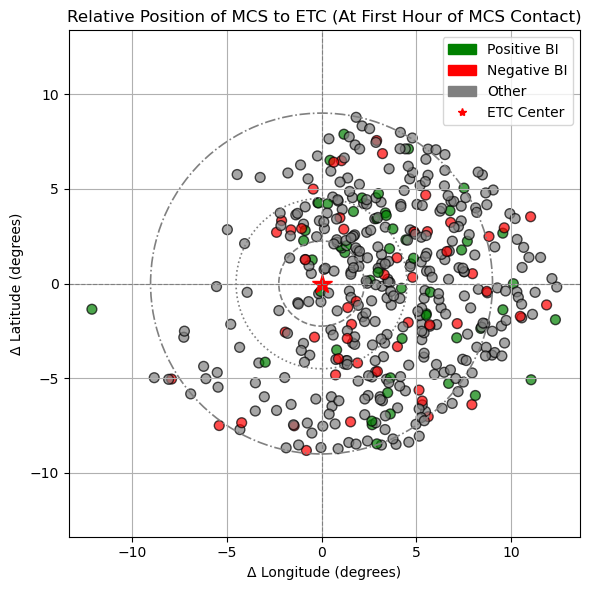

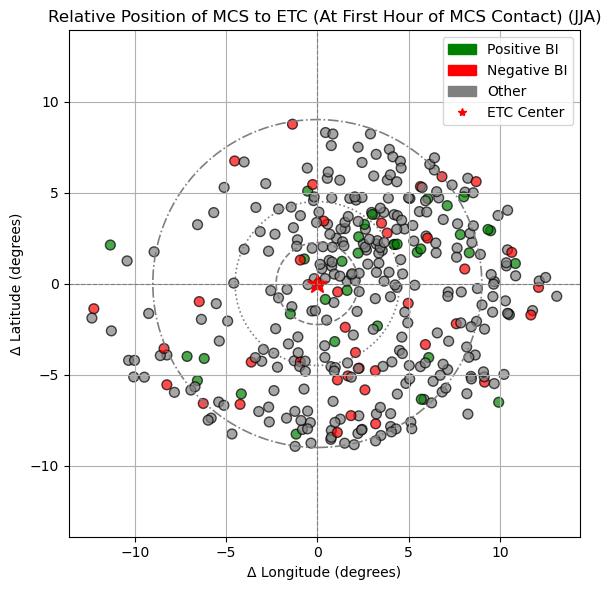

In [15]:
plt.figure(figsize=(6, 6))

# Scatter plot with color coding
plt.scatter(results['delta_lon'], results['delta_lat'],
            c=results['color'], s=50, edgecolor='k', alpha=0.7)

plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray',
                          fill=False, linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Relative Position of MCS to ETC (At First Hour of MCS Contact)')
# Optional: Create legend manually
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='green', label='Positive BI'),
    mpatches.Patch(color='red', label='Negative BI'),
    mpatches.Patch(color='gray', label='Other')
]
plt.legend(handles=legend_handles + [plt.Line2D([0], [0], marker='*', color='r', label='ETC Center', linestyle='')])
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))

# Scatter plot with color coding
plt.scatter(results_jja['delta_lon'], results_jja['delta_lat'],
            c=results_jja['color'], s=50, edgecolor='k', alpha=0.7)

plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray',
                          fill=False, linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Relative Position of MCS to ETC (At First Hour of MCS Contact) (JJA)')
# Legend
plt.legend(handles=legend_handles + [plt.Line2D([0], [0], marker='*', color='r', label='ETC Center', linestyle='')])
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


---
# CAPE and Shear

In [17]:
import xarray as xr
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from geopy.distance import geodesic
from scipy.interpolate import griddata
import calendar
import matplotlib.pyplot as plt
import cmocean

# Convert lon to 0–360
results = results_jja.copy()
results['lon_etc_360'] = results['lon_etc'] % 360

# Grid settings (in degrees from ETC center)
grid_res = 0.5
grid_extent = 10  # degrees ~1000 km
grid_x, grid_y = np.meshgrid(
    np.arange(-grid_extent, grid_extent + grid_res, grid_res),
    np.arange(-grid_extent, grid_extent + grid_res, grid_res)
)

cape_interp_list = []

def get_url_for_time(dt):
    base_url = "https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/"
    year = dt.strftime('%Y')
    month = dt.strftime('%m')
    ndays = calendar.monthrange(int(year), int(month))[1]
    return (f"{base_url}e5.oper.an.sfc/{year}{month}/"
            f"e5.oper.an.sfc.128_059_cape.ll025sc."
            f"{year}{month}0100_{year}{month}{ndays}23.nc")

for i, row in tqdm(results.iterrows(), total=len(results)):
    try:
        dt = pd.to_datetime(row['time'])
        url = get_url_for_time(dt)
        
        # Load CAPE at exact time
        cape_ds = xr.open_dataset(url)
        cape_var = list(cape_ds.data_vars)[1]
        cape = cape_ds[cape_var].sel(time=dt, method='nearest')

        # Subset spatially (~10° box around ETC center)
        lat_c, lon_c = row['lat_etc'], row['lon_etc_360']
        dlat = dlon = 10
        cape_cut = cape.sel(latitude=slice(lat_c + dlat, lat_c - dlat),
                            longitude=slice(lon_c - dlon, lon_c + dlon))

        # Grid: relative lat/lon
        lats = cape_cut.latitude.values
        lons = cape_cut.longitude.values
        lons, lats = np.meshgrid(lons, lats)
        rel_lat = lats - lat_c
        rel_lon = lons - lon_c

        # Mask within 1000 km radius
        flat_coords = np.column_stack((lats.ravel(), lons.ravel()))
        distances = np.array([
            geodesic((lat_c, lon_c), (lat, lon)).km for lat, lon in flat_coords
        ]).reshape(lats.shape)
        mask = distances <= 1000

        # Interpolate to common grid
        points = np.column_stack((rel_lon[mask], rel_lat[mask]))
        values = cape_cut.values[mask]
        cape_interp = griddata(points, values, (grid_x, grid_y), method='linear')

        cape_interp_list.append(cape_interp)
    except Exception as e:
        print(f"⚠️ Skipped index {i}: {e}")


100%|██████████| 361/361 [08:59<00:00,  1.50s/it]


In [18]:
cape_composite = np.nanmean(np.array(cape_interp_list), axis=0)

np.save('/scratch/negishi/zholder/MCS_NEX_v3/cape_JJA.npy',cape_composite)

/tmp/ipykernel_4007340/4173435910.py:1: RuntimeWarning: Mean of empty slice
  cape_composite = np.nanmean(np.array(cape_interp_list), axis=0)


In [19]:
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_JJA.npy')

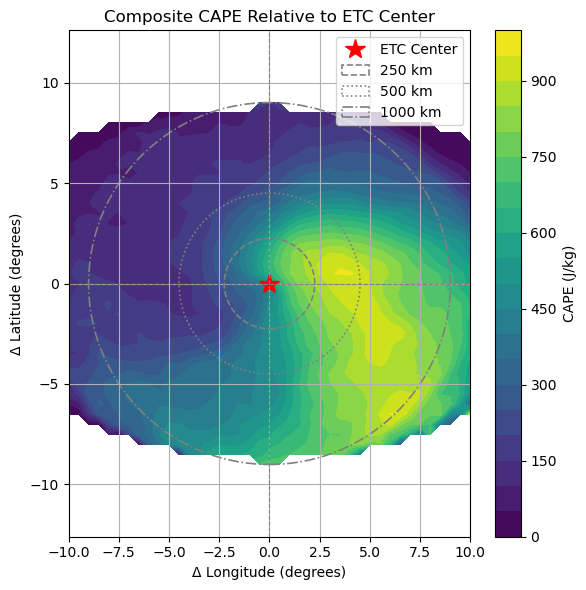

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10  # +/- degrees
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

plt.figure(figsize=(6, 6))

# Filled contour of composite CAPE
cf = plt.contourf(grid_x, grid_y, cc, levels=20)
cb = plt.colorbar(cf, label='CAPE (J/kg)')

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

# Concentric rings (based on threshold)
if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 1500:
    for km, style in zip([500, 1000, 1500], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 2000:
    for km, style in zip([500, 1000, 2000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and layout
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Composite CAPE Relative to ETC Center')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


# SHEAR

In [15]:
import xarray as xr
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from geopy.distance import geodesic
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Assume results DataFrame exists with 'time', 'lat_etc', 'lon_etc'
results = results_jja.copy()
results['lon_etc_360'] = results['lon_etc'] % 360

grid_res = 0.5
grid_extent = 10
grid_x, grid_y = np.meshgrid(
    np.arange(-grid_extent, grid_extent + grid_res, grid_res),
    np.arange(-grid_extent, grid_extent + grid_res, grid_res)
)

shear_interp_list = []

def get_uv_url(component, dt):
    var_code = '131_u' if component == 'U' else '132_v'
    # base = "https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/"
    base = "https://thredds.rda.ucar.edu/thredds/dodsC/files/g/d633000/"
    ymd = dt.strftime("%Y%m%d")
    ym = dt.strftime("%Y%m")
    return (f"{base}e5.oper.an.pl/{ym}/"
            f"e5.oper.an.pl.128_{var_code}.ll025uv.{ymd}00_{ymd}23.nc")

for i, row in tqdm(results.iterrows(), total=len(results)):
    try:
        dt = pd.to_datetime(row['time'])
        lat_c, lon_c = row['lat_etc'], row['lon_etc_360']

        # Load data for 1000 hPa and 700 hPa levels
        levels = [1000, 700]

        u_url = get_uv_url('U', dt)
        v_url = get_uv_url('V', dt)

        u_ds = xr.open_dataset(u_url)
        v_ds = xr.open_dataset(v_url)

        u = u_ds['U'].sel(time=dt, level=levels, method='nearest')
        v = v_ds['V'].sel(time=dt, level=levels, method='nearest')

        # Subset ~10° around storm center
        dlat = dlon = 10
        u_cut = u.sel(latitude=slice(lat_c + dlat, lat_c - dlat),
                      longitude=slice(lon_c - dlon, lon_c + dlon))
        v_cut = v.sel(latitude=slice(lat_c + dlat, lat_c - dlat),
                      longitude=slice(lon_c - dlon, lon_c + dlon))

        # Compute shear magnitude
        du = u_cut.sel(level=700) - u_cut.sel(level=1000)
        dv = v_cut.sel(level=700) - v_cut.sel(level=1000)
        shear = np.sqrt(du**2 + dv**2)

        # Get relative coords
        lats = shear.latitude.values
        lons = shear.longitude.values
        lons, lats = np.meshgrid(lons, lats)
        rel_lat = lats - lat_c
        rel_lon = lons - lon_c

        # Mask points >1000 km
        flat_coords = np.column_stack((lats.ravel(), lons.ravel()))
        distances = np.array([
            geodesic((lat_c, lon_c), (lat, lon)).km for lat, lon in flat_coords
        ]).reshape(lats.shape)
        mask = distances <= 1000

        # Interpolate
        points = np.column_stack((rel_lon[mask], rel_lat[mask]))
        values = shear.values[mask]
        shear_interp = griddata(points, values, (grid_x, grid_y), method='linear')

        shear_interp_list.append(shear_interp)

    except Exception as e:
        print(f"⚠️ Skipped index {i}: {e}")

# Composite
shear_composite = np.nanmean(np.array(shear_interp_list), axis=0)
np.save('/scratch/negishi/zholder/MCS_NEX_v3/shear_JJA.npy',shear_composite)

100%|██████████| 361/361 [1:12:52<00:00, 12.11s/it]
/tmp/ipykernel_4131425/3611091682.py:86: RuntimeWarning: Mean of empty slice
  shear_composite = np.nanmean(np.array(shear_interp_list), axis=0)


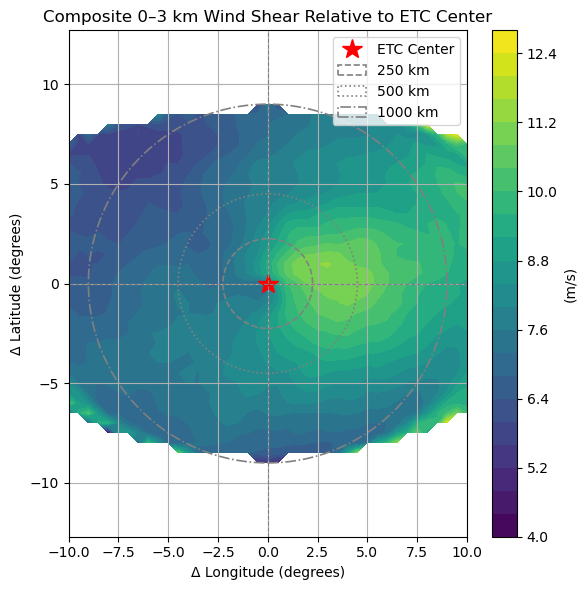

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10  # +/- degrees
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

plt.figure(figsize=(6, 6))

# Filled contour of composite CAPE
cf = plt.contourf(grid_x, grid_y, shear_composite, levels=20)
cb = plt.colorbar(cf, label='(m/s)')

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

# Concentric rings (based on threshold)
if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 1500:
    for km, style in zip([500, 1000, 1500], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 2000:
    for km, style in zip([500, 1000, 2000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and layout
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Composite 0–3 km Wind Shear Relative to ETC Center')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


---
# FIG 4 PLT

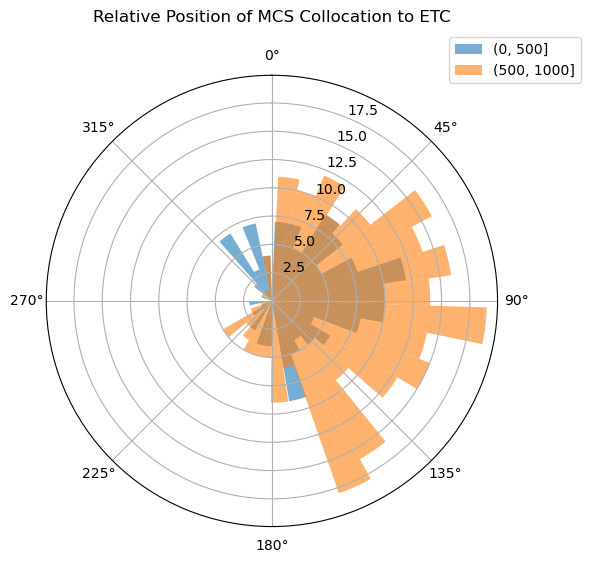

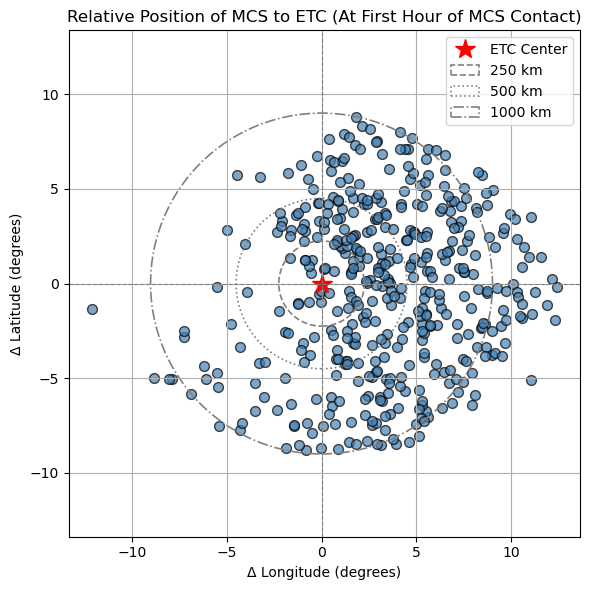

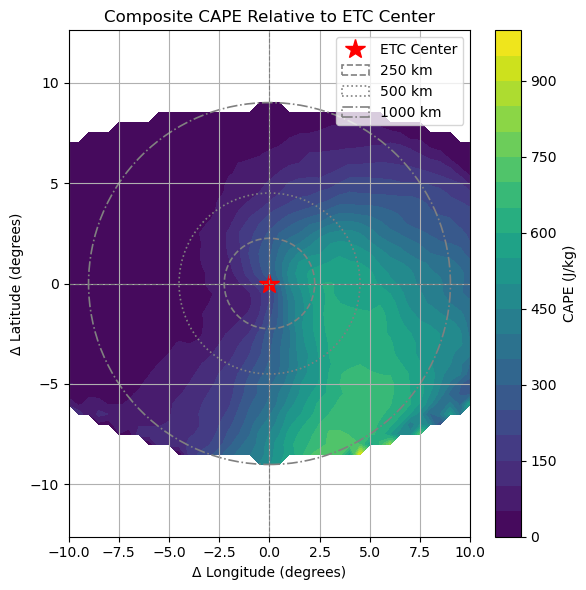

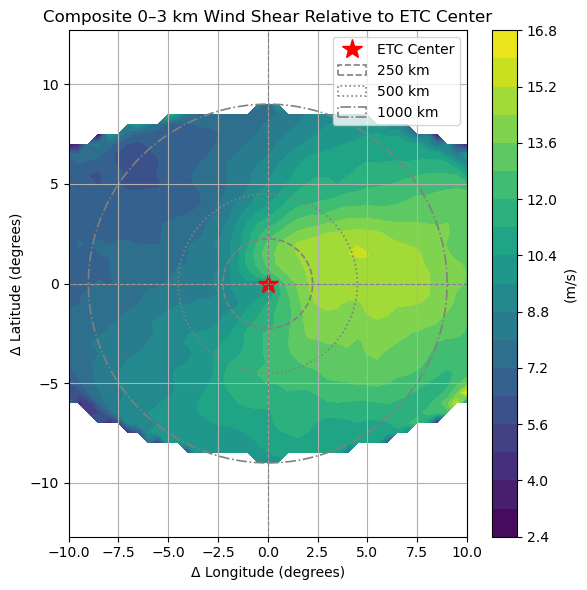

In [32]:
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_MAM.npy')
ss = np.load('/scratch/negishi/zholder/MCS_NEX_v3/shear_MAM.npy')
####### ROSE ###########
# Setup figure
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Loop through distance bins and plot direction histograms
for i, bin_label in enumerate(results['distance_bin'].cat.categories):
    subset = results[results['distance_bin'] == bin_label]
    if subset.empty:
        continue
    # Plot polar histogram: angle in radians
    ax.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

# Format plot
ax.set_theta_zero_location('N')  # 0° at the top
ax.set_theta_direction(-1)       # Clockwise direction

plt.title('Relative Position of MCS Collocation to ETC', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

#######SCATTER#############
plt.figure(figsize=(6, 6))

# Scatter plot
plt.scatter(results['delta_lon'], results['delta_lat'],
            color='steelblue', s=50, edgecolor='k', alpha=0.7)

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

if thresh_dist == 1000:
# Add concentric rings (in degrees, approx.)
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0  # approximate conversion
        ring = plt.Circle((0, 0), radius_deg, color='gray',
                        fill=False, linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Plot settings
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Relative Position of MCS to ETC (At First Hour of MCS Contact)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio square
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np
import cmocean

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10  # +/- degrees
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

##### CAPE ########
plt.figure(figsize=(6, 6))

# Filled contour of composite CAPE
cf = plt.contourf(grid_x, grid_y, cc, levels=20)
cb = plt.colorbar(cf, label='CAPE (J/kg)')

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

# Concentric rings (based on threshold)
if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 1500:
    for km, style in zip([500, 1000, 1500], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 2000:
    for km, style in zip([500, 1000, 2000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and layout
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Composite CAPE Relative to ETC Center')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### SHEAR #####
import matplotlib.pyplot as plt
import numpy as np
import cmocean

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10  # +/- degrees
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

plt.figure(figsize=(6, 6))

# Filled contour of composite CAPE
cf = plt.contourf(grid_x, grid_y, ss, levels=20)
cb = plt.colorbar(cf, label='(m/s)')

# Plot ETC center
plt.plot(0, 0, 'r*', markersize=15, label='ETC Center')

# Concentric rings (based on threshold)
if thresh_dist == 1000:
    for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 1500:
    for km, style in zip([500, 1000, 1500], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)
elif thresh_dist == 2000:
    for km, style in zip([500, 1000, 2000], ['--', ':', '-.']):
        radius_deg = km / 111.0
        ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False,
                          linestyle=style, linewidth=1.2, label=f'{km} km')
        plt.gca().add_patch(ring)

# Reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Labels and layout
plt.xlabel('Δ Longitude (degrees)')
plt.ylabel('Δ Latitude (degrees)')
plt.title('Composite 0–3 km Wind Shear Relative to ETC Center')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


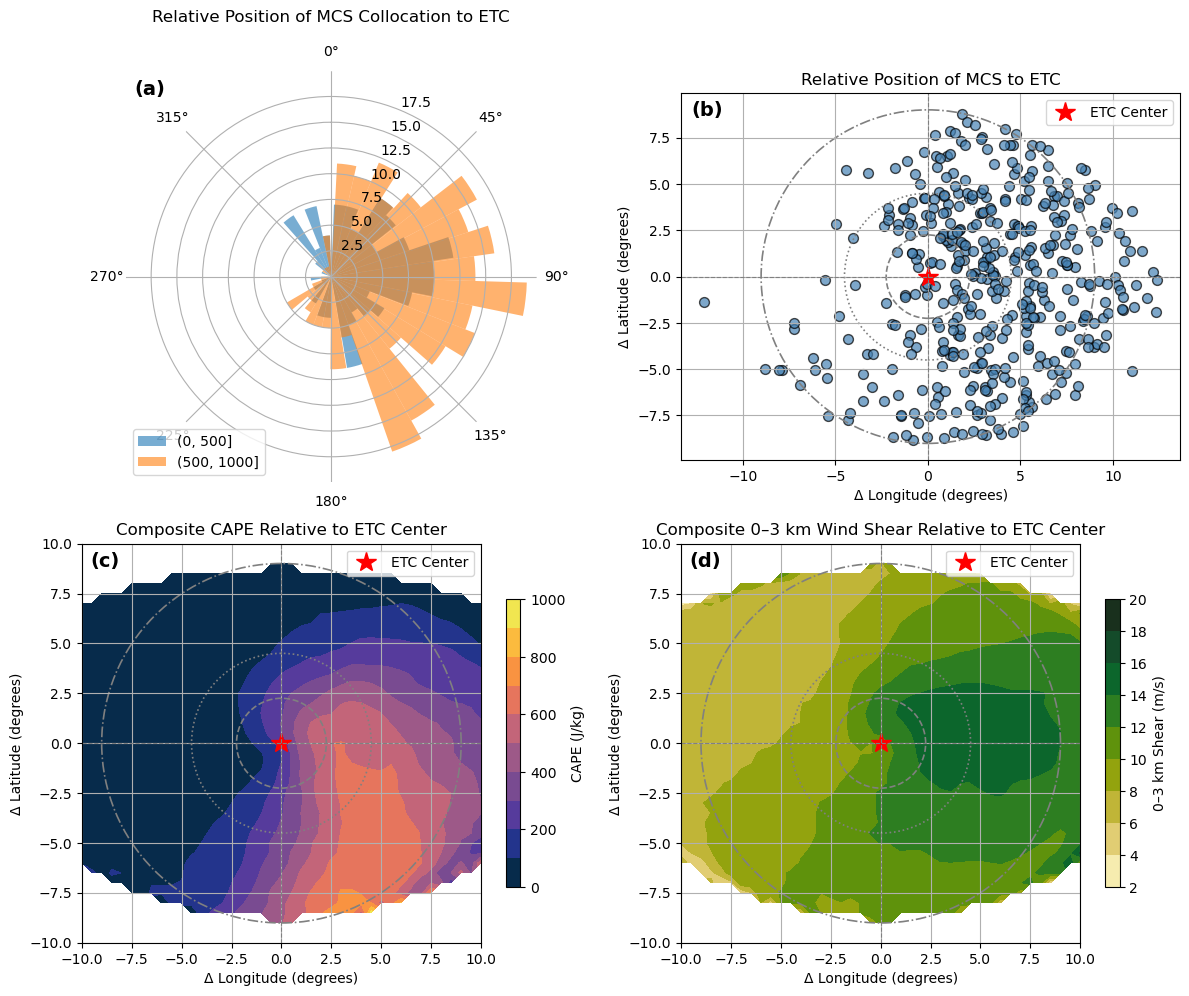

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean  # if you're using cmocean colormaps

# Load data
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_MAM.npy')
ss = np.load('/scratch/negishi/zholder/MCS_NEX_v3/shear_MAM.npy')

# Assume you have a DataFrame `results` and a variable `thresh_dist`
# with 'theta_deg', 'delta_lon', 'delta_lat', and 'distance_bin'

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

# Create figure and subplots
fig = plt.figure(figsize=(12, 10))

# 1. Rose plot (polar) – use add_subplot with polar=True
ax1 = fig.add_subplot(221, polar=True)

# 2. Scatter
ax2 = fig.add_subplot(222)

# 3. CAPE
ax3 = fig.add_subplot(223)

# 4. Shear
ax4 = fig.add_subplot(224)

##################################
# 1. Rose Plot
##################################
for i, bin_label in enumerate(results['distance_bin'].cat.categories):
    subset = results[results['distance_bin'] == bin_label]
    if subset.empty:
        continue
    ax1.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Relative Position of MCS Collocation to ETC', y=1.1)
ax1.legend(loc='lower left')
# Keep circular axes, remove subplot frame
ax1.spines['polar'].set_visible(True)
ax1.set_frame_on(False)

##################################
# 2. Scatter Plot
##################################
ax2.scatter(results['delta_lon'], results['delta_lat'], color='steelblue', s=50, edgecolor='k', alpha=0.7)
ax2.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax2.add_patch(ring)

ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_xlabel('Δ Longitude (degrees)')
ax2.set_ylabel('Δ Latitude (degrees)')
ax2.set_title('Relative Position of MCS to ETC')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True)

##################################
# 3. Composite CAPE
##################################
cf = ax3.contourf(grid_x, grid_y, cc, levels=np.arange(0, 1100, 100), cmap='cmo.thermal')
fig.colorbar(cf, ax=ax3, label='CAPE (J/kg)', shrink=0.7)
ax3.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax3.add_patch(ring)

ax3.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.set_xlabel('Δ Longitude (degrees)')
ax3.set_ylabel('Δ Latitude (degrees)')
ax3.set_title('Composite CAPE Relative to ETC Center')
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True)

##################################
# 4. Composite Wind Shear
##################################
cf = ax4.contourf(grid_x, grid_y, ss, levels=np.arange(2, 22, 2), cmap='cmo.speed')
fig.colorbar(cf, ax=ax4, label='0–3 km Shear (m/s)', shrink=0.7)
ax4.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax4.add_patch(ring)

ax4.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.set_xlabel('Δ Longitude (degrees)')
ax4.set_ylabel('Δ Latitude (degrees)')
ax4.set_title('Composite 0–3 km Wind Shear Relative to ETC Center')
ax4.legend()
ax4.set_aspect('equal')
ax4.grid(True)

# Final layout
plt.tight_layout()
labels = ['(a)', '(b)', '(c)', '(d)']
axes = [ax1, ax2, ax3, ax4]

for label, ax in zip(labels, axes):
    ax.text(0.02, 0.98, label,
            transform=ax.transAxes,
            fontsize=14,
            fontweight='bold',
            va='top',
            ha='left',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round'))
plt.show()


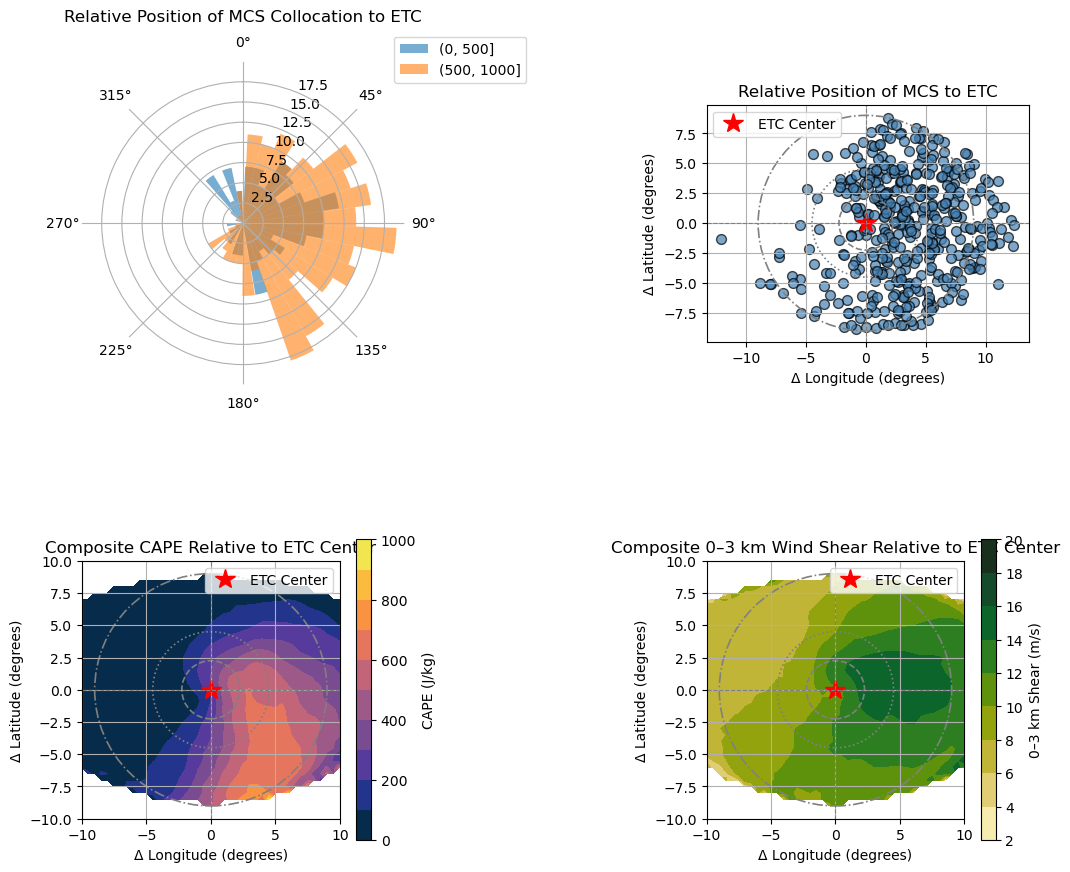

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmocean  # Optional if you use cmocean colormaps

# Load data
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_MAM.npy')
ss = np.load('/scratch/negishi/zholder/MCS_NEX_v3/shear_MAM.npy')

# Parameters
thresh_dist = 1000
grid_res = 0.5
extent_deg = 10
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

# Create flexible grid layout
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 4, figure=fig, width_ratios=[1, 0.1, 1, 0.05], height_ratios=[1, 1])

# Axes definitions
ax1 = fig.add_subplot(gs[0, 0], polar=True)  # Rose plot (shifted left)
ax2 = fig.add_subplot(gs[0, 2])              # Scatter plot (same width as bottom right)
ax3 = fig.add_subplot(gs[1, 0])              # CAPE
ax4 = fig.add_subplot(gs[1, 2])              # Shear

##################################
# 1. Rose Plot
##################################
for i, bin_label in enumerate(results['distance_bin'].cat.categories):
    subset = results[results['distance_bin'] == bin_label]
    if subset.empty:
        continue
    ax1.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Relative Position of MCS Collocation to ETC', y=1.1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
ax1.spines['polar'].set_visible(True)
ax1.set_frame_on(False)

##################################
# 2. Scatter Plot
##################################
ax2.scatter(results['delta_lon'], results['delta_lat'], color='steelblue', s=50, edgecolor='k', alpha=0.7)
ax2.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax2.add_patch(ring)

ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_xlabel('Δ Longitude (degrees)')
ax2.set_ylabel('Δ Latitude (degrees)')
ax2.set_title('Relative Position of MCS to ETC')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True)

##################################
# 3. Composite CAPE
##################################
cf = ax3.contourf(grid_x, grid_y, cc, levels=np.arange(0, 1100, 100), cmap='cmo.thermal')
fig.colorbar(cf, ax=ax3, label='CAPE (J/kg)', shrink=0.7)
ax3.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax3.add_patch(ring)

ax3.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.set_xlabel('Δ Longitude (degrees)')
ax3.set_ylabel('Δ Latitude (degrees)')
ax3.set_title('Composite CAPE Relative to ETC Center')
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True)

##################################
# 4. Composite Wind Shear
##################################
cf = ax4.contourf(grid_x, grid_y, ss, levels=np.arange(2, 22, 2), cmap='cmo.speed')
fig.colorbar(cf, ax=ax4, label='0–3 km Shear (m/s)', shrink=0.7)
ax4.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax4.add_patch(ring)

ax4.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.set_xlabel('Δ Longitude (degrees)')
ax4.set_ylabel('Δ Latitude (degrees)')
ax4.set_title('Composite 0–3 km Wind Shear Relative to ETC Center')
ax4.legend()
ax4.set_aspect('equal')
ax4.grid(True)

# Final layout
plt.tight_layout()
plt.show()


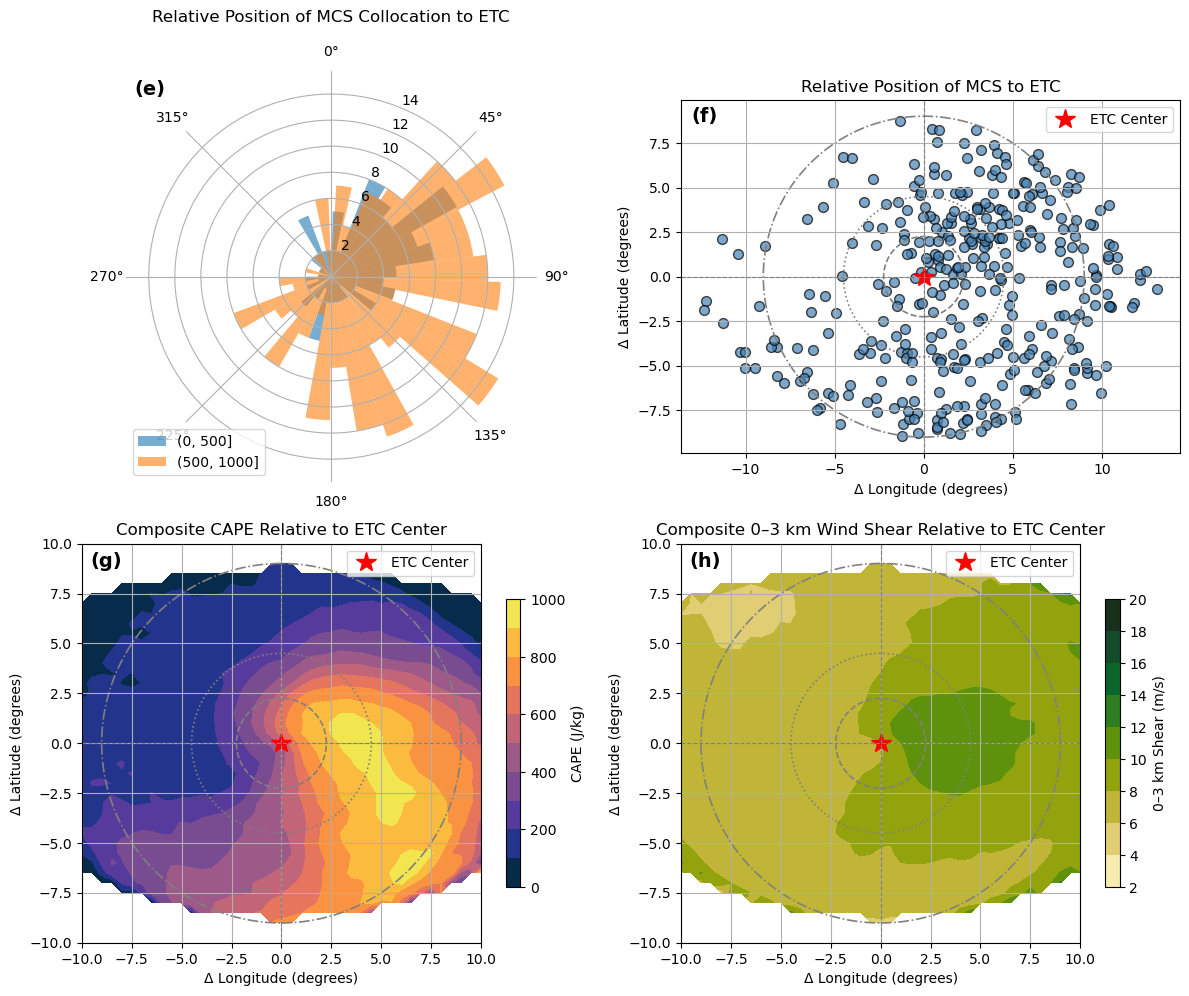

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean  # if you're using cmocean colormaps

# Load data
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_JJA.npy')
ss = np.load('/scratch/negishi/zholder/MCS_NEX_v3/shear_JJA.npy')

# Assume you have a DataFrame `results` and a variable `thresh_dist`
# with 'theta_deg', 'delta_lon', 'delta_lat', and 'distance_bin'

# Parameters
thresh_dist = 1000  # km
grid_res = 0.5
extent_deg = 10
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

# Create figure and subplots
fig = plt.figure(figsize=(12, 10))

# 1. Rose plot (polar) – use add_subplot with polar=True
ax1 = fig.add_subplot(221, polar=True)

# 2. Scatter
ax2 = fig.add_subplot(222)

# 3. CAPE
ax3 = fig.add_subplot(223)

# 4. Shear
ax4 = fig.add_subplot(224)

##################################
# 1. Rose Plot
##################################
for i, bin_label in enumerate(results_jja['distance_bin'].cat.categories):
    subset = results_jja[results_jja['distance_bin'] == bin_label]
    if subset.empty:
        continue
    ax1.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Relative Position of MCS Collocation to ETC', y=1.1)
ax1.legend(loc='lower left')
# Keep circular axes, remove subplot frame
ax1.spines['polar'].set_visible(True)
ax1.set_frame_on(False)

##################################
# 2. Scatter Plot
##################################
ax2.scatter(results_jja['delta_lon'], results_jja['delta_lat'], color='steelblue', s=50, edgecolor='k', alpha=0.7)
ax2.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax2.add_patch(ring)

ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_xlabel('Δ Longitude (degrees)')
ax2.set_ylabel('Δ Latitude (degrees)')
ax2.set_title('Relative Position of MCS to ETC')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True)

##################################
# 3. Composite CAPE
##################################
cf = ax3.contourf(grid_x, grid_y, cc, levels=np.arange(0, 1100, 100), cmap='cmo.thermal')
fig.colorbar(cf, ax=ax3, label='CAPE (J/kg)', shrink=0.7)
ax3.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax3.add_patch(ring)

ax3.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.set_xlabel('Δ Longitude (degrees)')
ax3.set_ylabel('Δ Latitude (degrees)')
ax3.set_title('Composite CAPE Relative to ETC Center')
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True)

##################################
# 4. Composite Wind Shear
##################################
cf = ax4.contourf(grid_x, grid_y, ss, levels=np.arange(2, 22, 2), cmap='cmo.speed')
fig.colorbar(cf, ax=ax4, label='0–3 km Shear (m/s)', shrink=0.7)
ax4.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax4.add_patch(ring)

ax4.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.set_xlabel('Δ Longitude (degrees)')
ax4.set_ylabel('Δ Latitude (degrees)')
ax4.set_title('Composite 0–3 km Wind Shear Relative to ETC Center')
ax4.legend()
ax4.set_aspect('equal')
ax4.grid(True)

# Final layout
plt.tight_layout()
labels = ['(a)', '(b)', '(c)', '(d)']
axes = [ax1, ax2, ax3, ax4]

for label, ax in zip(labels, axes):
    ax.text(0.02, 0.98, label,
            transform=ax.transAxes,
            fontsize=14,
            fontweight='bold',
            va='top',
            ha='left',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round'))

plt.show()


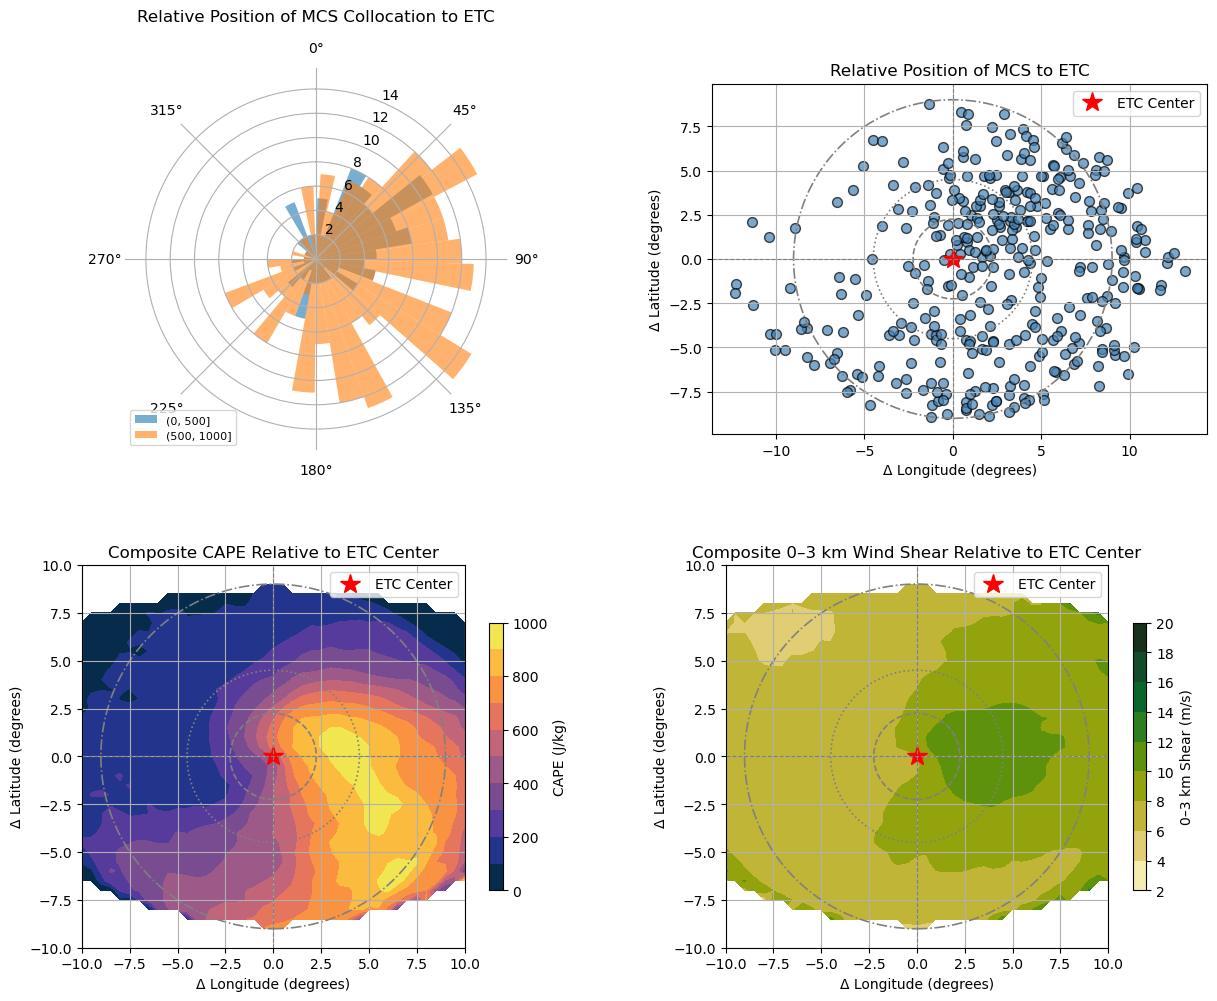

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmocean

# Load data
cc = np.load('/scratch/negishi/zholder/MCS_NEX_v3/cape_JJA.npy')
ss = np.load('/scratch/negishi/zholder/MCS_NEX_v3/shear_JJA.npy')

# Grid for CAPE/shear plots
grid_res = 0.5
extent_deg = 10
grid_x, grid_y = np.meshgrid(
    np.arange(-extent_deg, extent_deg + grid_res, grid_res),
    np.arange(-extent_deg, extent_deg + grid_res, grid_res)
)

# Create figure with GridSpec
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.3)

# Shift the top row left by adjusting left/right margins
gs.update(left=0.001, right=0.95, top=0.95, bottom=0.07)

# Assign axes
ax1 = fig.add_subplot(gs[0, 0], polar=True)   # Rose
ax2 = fig.add_subplot(gs[0, 1])               # Scatter
ax3 = fig.add_subplot(gs[1, 0])               # CAPE
ax4 = fig.add_subplot(gs[1, 1])               # Shear

##################################
# 1. Rose Plot
##################################
for i, bin_label in enumerate(results_jja['distance_bin'].cat.categories):
    subset = results_jja[results_jja['distance_bin'] == bin_label]
    if subset.empty:
        continue
    ax1.hist(np.radians(subset['theta_deg']), bins=36, label=f'{bin_label}', alpha=0.6)

ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Relative Position of MCS Collocation to ETC', y=1.1)
ax1.legend(loc='lower left', fontsize=8)
ax1.set_frame_on(False)
ax1.spines['polar'].set_visible(True)

##################################
# 2. Scatter Plot
##################################
ax2.scatter(results_jja['delta_lon'], results_jja['delta_lat'], color='steelblue', s=50, edgecolor='k', alpha=0.7)
ax2.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax2.add_patch(ring)

ax2.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax2.set_xlabel('Δ Longitude (degrees)')
ax2.set_ylabel('Δ Latitude (degrees)')
ax2.set_title('Relative Position of MCS to ETC')
ax2.legend()
ax2.set_aspect('equal')
ax2.grid(True)

##################################
# 3. Composite CAPE
##################################
cf = ax3.contourf(grid_x, grid_y, cc, levels=np.arange(0, 1100, 100), cmap='cmo.thermal')
fig.colorbar(cf, ax=ax3, label='CAPE (J/kg)', shrink=0.7)
ax3.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax3.add_patch(ring)

ax3.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax3.set_xlabel('Δ Longitude (degrees)')
ax3.set_ylabel('Δ Latitude (degrees)')
ax3.set_title('Composite CAPE Relative to ETC Center')
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True)

##################################
# 4. Composite Shear
##################################
cf = ax4.contourf(grid_x, grid_y, ss, levels=np.arange(2, 22, 2), cmap='cmo.speed')
fig.colorbar(cf, ax=ax4, label='0–3 km Shear (m/s)', shrink=0.7)
ax4.plot(0, 0, 'r*', markersize=15, label='ETC Center')

for km, style in zip([250, 500, 1000], ['--', ':', '-.']):
    radius_deg = km / 111.0
    ring = plt.Circle((0, 0), radius_deg, color='gray', fill=False, linestyle=style, linewidth=1.2)
    ax4.add_patch(ring)

ax4.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.axvline(0, color='gray', linestyle='--', linewidth=0.8)
ax4.set_xlabel('Δ Longitude (degrees)')
ax4.set_ylabel('Δ Latitude (degrees)')
ax4.set_title('Composite 0–3 km Wind Shear Relative to ETC Center')
ax4.legend()
ax4.set_aspect('equal')
ax4.grid(True)

plt.show()


---

# Fig3

In [16]:
unique_fruits = results['tracks'].unique().tolist()
dsobs_netc = dsobs.where(~dsobs.tracks.isin(unique_fruits), drop=True)
dsobs_etc = dsobs.sel(tracks = unique_fruits)

unique_fruits_jja = results_jja['tracks'].unique().tolist()
dsobs_netc_jja = dsobs_jja.where(~dsobs_jja.tracks.isin(unique_fruits_jja), drop=True)
dsobs_etc_jja = dsobs_jja.sel(tracks = unique_fruits_jja)

print(f'ETC Tracks: {len(dsobs_etc.tracks)}')
print(f'NETC Tracks: {len(dsobs_netc.tracks)}')

print(f'ETC Tracks JJA: {len(dsobs_etc_jja.tracks)}')
print(f'NETC Tracks JJA: {len(dsobs_netc_jja.tracks)}')

ETC Tracks: 434
NETC Tracks: 615
ETC Tracks JJA: 361
NETC Tracks JJA: 1529


In [17]:
sel_tracks = ds.sel(track=np.unique(results.track.values))

sel_tracks_jja = ds.sel(track=np.unique(results_jja.track.values))

---

In [41]:
results_tracks_pos = results[results['color'].isin(['green'])]
results_tracks_neg = results[results['color'].isin(['red'])]

results_jja_tracks_pos = results_jja[results_jja['color'].isin(['green'])]
results_jja_tracks_neg = results_jja[results_jja['color'].isin(['red'])]

sel_tracks_pos = ds.sel(track=np.unique(results_tracks_pos.track.values))
sel_tracks_neg = ds.sel(track=np.unique(results_tracks_neg.track.values))

sel_tracks_jja_pos = ds.sel(track=np.unique(results_jja_tracks_pos.track.values))
sel_tracks_jja_neg = ds.sel(track=np.unique(results_jja_tracks_pos.track.values))

In [49]:
results[results['track'].isin(sel_tracks_pos.track.values)][results['color'].isin(['green'])].track.values

/tmp/ipykernel_1153484/1961335191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results[results['track'].isin(sel_tracks_pos.track.values)][results['color'].isin(['green'])].track.values


array([5624, 7453, 7041, 6031, 6264, 6465, 5221, 6264, 5435, 6264, 6453,
       6875, 6033, 7660, 6033, 6651, 6033, 6465, 5860, 5221, 6875, 7689,
       5848, 6875, 6875, 6264, 6858, 5624, 6252, 6264, 6651, 5653, 7660,
       7631, 7660, 5221, 5221, 5614, 5051, 6670, 5230, 5860, 5051, 6866,
       5240, 6027, 6252, 5624, 7066, 5848, 5413])

In [52]:
len()
len(neg_BI_dates)

164

In [53]:
len(all_pos)

136

In [51]:
len(results[results['track'].isin(sel_tracks_neg.track.values)][results['color'].isin(['red'])].track.values)

/tmp/ipykernel_1153484/1260462963.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(results[results['track'].isin(sel_tracks_neg.track.values)][results['color'].isin(['red'])].track.values)


51

In [22]:
pos_mcs_tracks = results_tracks_pos['tracks'].unique().tolist()
neg_mcs_tracks = results_tracks_neg['tracks'].unique().tolist()
dsobs_pos = dsobs.sel(tracks = pos_mcs_tracks)
dsobs_neg = dsobs.sel(tracks = neg_mcs_tracks)

pos_mcs_tracks_jja = results_jja_tracks_pos['tracks'].unique().tolist()
neg_mcs_tracks_jja = results_jja_tracks_neg['tracks'].unique().tolist()
dsobs_pos_jja = dsobs_jja.sel(tracks = pos_mcs_tracks_jja)
dsobs_neg_jja = dsobs_jja.sel(tracks = neg_mcs_tracks_jja)

/tmp/ipykernel_3380598/4252034783.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):


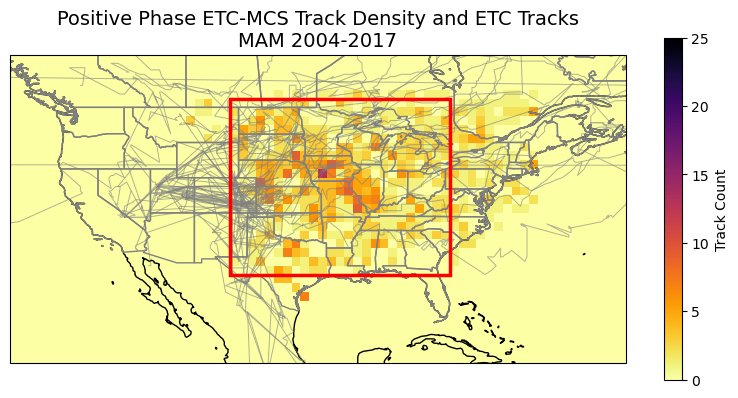

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc, lon_etc = extract_latlon(dsobs_pos)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc, _, _ = np.histogram2d(lat_etc, lon_etc, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc,
                   cmap='inferno_r', vmin=0, vmax=25,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC)')

# --- Overlay track lines ---
def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
    for i in range(ds.dims['track']):
        lat = ds.lat.isel(track=i).values
        lon = ds.lon.isel(track=i).values
        valid = ~np.isnan(lat) & ~np.isnan(lon)
        if np.sum(valid) < 2:
            continue
        ax.plot(lon[valid], lat[valid],
                transform=ccrs.PlateCarree(),
                color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks_pos, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count',shrink=0.6)

# --- Final layout ---
plt.title(f'Positive Phase ETC-MCS Track Density and ETC Tracks\nMAM 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()


---

/tmp/ipykernel_4131425/2728334566.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):


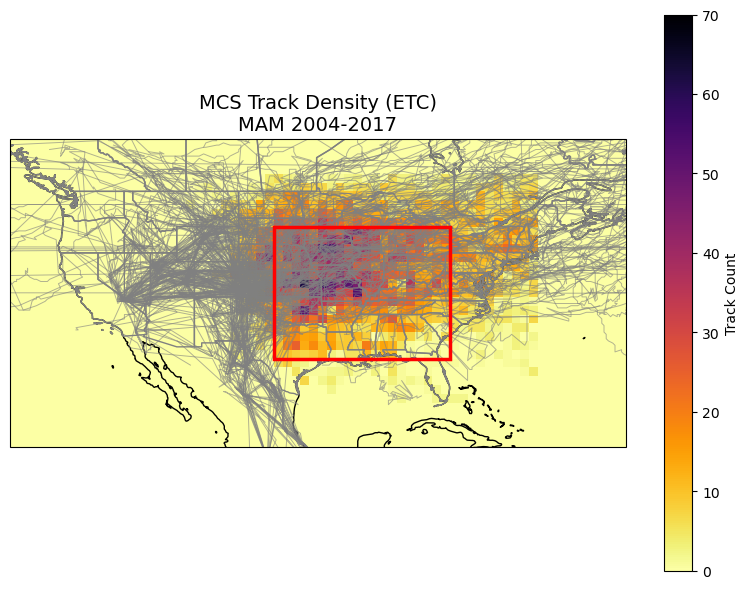

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc, lon_etc = extract_latlon(dsobs_etc)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc, _, _ = np.histogram2d(lat_etc, lon_etc, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC)')

# --- Overlay track lines ---
def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
    for i in range(ds.dims['track']):
        lat = ds.lat.isel(track=i).values
        lon = ds.lon.isel(track=i).values
        valid = ~np.isnan(lat) & ~np.isnan(lon)
        if np.sum(valid) < 2:
            continue
        ax.plot(lon[valid], lat[valid],
                transform=ccrs.PlateCarree(),
                color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count')

# --- Final layout ---
plt.title(f'MCS Track Density (ETC)\n{s_list} 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3228725/1420449917.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):


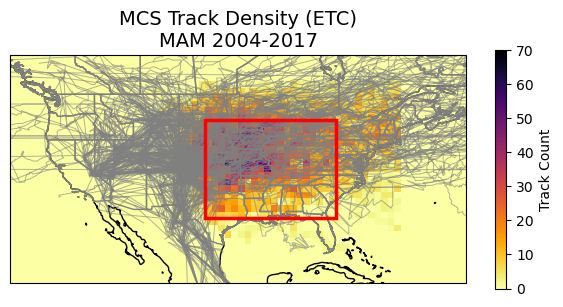

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc, lon_etc = extract_latlon(dsobs_etc)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc, _, _ = np.histogram2d(lat_etc, lon_etc, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC)')

# --- Overlay track lines ---
def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
    for i in range(ds.dims['track']):
        lat = ds.lat.isel(track=i).values
        lon = ds.lon.isel(track=i).values
        valid = ~np.isnan(lat) & ~np.isnan(lon)
        if np.sum(valid) < 2:
            continue
        ax.plot(lon[valid], lat[valid],
                transform=ccrs.PlateCarree(),
                color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count')

# --- Final layout ---
plt.title(f'MCS Track Density (ETC)\n{s_list} 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipykernel_3228725/1420449917.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):


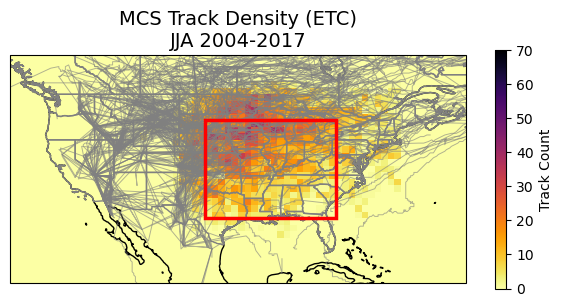

In [29]:

# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc_jja, lon_etc_jja = extract_latlon(dsobs_etc_jja)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc_jja, _, _ = np.histogram2d(lat_etc_jja, lon_etc_jja, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc_jja,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC) JJA')

# # --- Overlay track lines ---
# def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
#     for i in range(ds.dims['track']):
#         lat = ds.lat.isel(track=i).values
#         lon = ds.lon.isel(track=i).values
#         valid = ~np.isnan(lat) & ~np.isnan(lon)
#         if np.sum(valid) < 2:
#             continue
#         ax.plot(lon[valid], lat[valid],
#                 transform=ccrs.PlateCarree(),
#                 color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks_jja, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count')

# --- Final layout ---
plt.title(f'MCS Track Density (ETC)\n{s_list_jja} 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()


# LOAD All precip

In [18]:
ll = xr.open_dataset('/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/JJAs/20040101.0000_20050101.0000/mcstrack_20040601_000000.nc')
lats = ll.lat.values
lons = ll.lon.values

In [19]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_MAM/'

# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_MAM_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)

    file_path_total = os.path.join(data_dir, f"{year}_MAM.npy")
    arr_total = np.load(file_path_total)
    arrays_total.append(arr_total)

# Stack (concatenate) the arrays along the first axis (day axis)
mcs_array = np.concatenate(arrays_mcs, axis=0)
total_array = np.concatenate(arrays_total, axis=0)

#### JJA #####
# Path to the directory containing the .npy files
data_dir_jja = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum/'

# Initialize an empty list to store arrays
arrays_mcs_jja = []
arrays_total_jja = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir_jja, f"{year}_JJA_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs_jja.append(arr_mcs)

    file_path_total = os.path.join(data_dir_jja, f"{year}_JJA.npy")
    arr_total = np.load(file_path_total)
    arrays_total_jja.append(arr_total)

# Stack (concatenate) the arrays along the first axis (day axis)
mcs_array_jja = np.concatenate(arrays_mcs_jja, axis=0)
total_array_jja = np.concatenate(arrays_total_jja, axis=0)

print(f"Shape of concatenated mcs array: {mcs_array.shape}")
print(f"Shape of concatenated total array: {total_array.shape}")

print(f"Shape of concatenated mcs array: {mcs_array_jja.shape}")
print(f"Shape of concatenated total array: {total_array_jja.shape}")

Shape of concatenated mcs array: (1288, 715, 1100)
Shape of concatenated total array: (1288, 715, 1100)
Shape of concatenated mcs array: (1288, 715, 1100)
Shape of concatenated total array: (1288, 715, 1100)


In [20]:

# Load the dictionary
with open("/scratch/negishi/zholder/MCS_NEX_v3/o_tracks_etc.pkl", "rb") as f:
    o_tracks_etc = pickle.load(f)

with open("/scratch/negishi/zholder/MCS_NEX_v3/o_tracks_etc_JJA.pkl", "rb") as f:
    o_tracks_etc_jja = pickle.load(f)

In [21]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_ETC/'
# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_ETC_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)

# Stack (concatenate) the arrays along the first axis (day axis)
etc_array = np.concatenate(arrays_mcs, axis=0)

# Path to the directory containing the .npy files
data_dir_jja = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_ETC_JJA/'
# Initialize an empty list to store arrays
arrays_mcs_jja = []
arrays_total_jja = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs_jja = os.path.join(data_dir_jja, f"{year}_ETC_MCSONLY.npy")
    arr_mcs_jja = np.load(file_path_mcs_jja)
    arrays_mcs_jja.append(arr_mcs_jja)

# Stack (concatenate) the arrays along the first axis (day axis)
etc_array_jja = np.concatenate(arrays_mcs_jja, axis=0)

print(f"Shape of concatenated mcs array: {etc_array.shape}")
print(f"Shape of concatenated mcs array: {etc_array_jja.shape}")


Shape of concatenated mcs array: (1288, 715, 1100)
Shape of concatenated mcs array: (1288, 715, 1100)


---
# PHASE BREAKOUT

In [22]:
HI_expanded = []
for h in HI:
    # Collect h-1, h, h+1 if within valid bounds
    for offset in [-1, 0]:
        idx = h + offset
        if 0 <= idx < len(date_list):
            HI_expanded.append(idx)         
# Convert to arrays if needed
HI_expanded = np.array(HI_expanded)

HI_expanded_jja = []
for h in HI_jja:
    # Collect h-1, h, h+1 if within valid bounds
    for offset in [-1, 0]:
        idx = h + offset
        if 0 <= idx < len(date_list_jja):
            HI_expanded_jja.append(idx)         
# Convert to arrays if needed
HI_expanded_jja = np.array(HI_expanded_jja)

In [18]:
pos_rain_mcs = mcs_array[HI_expanded] 
neg_rain_mcs = mcs_array[np.unique(LI)] 

pos_rain_total = total_array[HI_expanded] 
neg_rain_total = total_array[np.unique(LI)]

threshold = np.percentile(total_array, 99, axis=0)
threshold_mcs = np.percentile(mcs_array, 99, axis=0)


pos_rain_mcs_jja = mcs_array_jja[HI_expanded_jja] 
neg_rain_mcs_jja = mcs_array_jja[np.unique(LI_jja)] 

pos_rain_total_jja = total_array_jja[HI_expanded_jja] 
neg_rain_total_jja = total_array[np.unique(LI_jja)]

threshold_jja = np.percentile(total_array_jja, 99, axis=0)
threshold_mcs_jja = np.percentile(mcs_array_jja, 99, axis=0)



# Create boolean masks of extreme events

extreme_pos = pos_rain_total > threshold  # shape: (days_pos, lat, lon)
extreme_neg = neg_rain_total > threshold  # shape: (days_neg, lat, lon)

extreme_pos_mcs = pos_rain_mcs > threshold  # shape: (days_pos, lat, lon)
extreme_neg_mcs = neg_rain_mcs > threshold  # shape: (days_neg, lat, lon)

extreme_pos_jja = pos_rain_total_jja > threshold_jja  # shape: (days_pos, lat, lon)
extreme_neg_jja = neg_rain_total_jja > threshold_jja  # shape: (days_neg, lat, lon)

extreme_pos_mcs_jja = pos_rain_mcs_jja > threshold_jja  # shape: (days_pos, lat, lon)
extreme_neg_mcs_jja = neg_rain_mcs_jja > threshold_jja  # shape: (days_neg, lat, lon)

# Count the number of extreme days at each grid point

extreme_count_pos = np.sum(extreme_pos, axis=0)  # shape: (lat, lon)
extreme_count_neg = np.sum(extreme_neg, axis=0)  # shape: (lat, lon)


extreme_count_pos_mcs = np.sum(extreme_pos_mcs, axis=0)  # shape: (lat, lon)
extreme_count_neg_mcs = np.sum(extreme_neg_mcs, axis=0)  # shape: (lat, lon)

extreme_count_pos_jja = np.sum(extreme_pos_jja, axis=0)  # shape: (lat, lon)
extreme_count_neg_jja = np.sum(extreme_neg_jja, axis=0)  # shape: (lat, lon)


extreme_count_pos_mcs_jja = np.sum(extreme_pos_mcs_jja, axis=0)  # shape: (lat, lon)
extreme_count_neg_mcs_jja = np.sum(extreme_neg_mcs_jja, axis=0)  # shape: (lat, lon)

# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point

# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))

n_pos_jja = len(HI_expanded_jja)
n_neg_jja = len(np.unique(LI_jja))

# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos = (extreme_count_pos / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg = (extreme_count_neg / n_neg) * 100 # shape: (lat, lon)

freq_extreme_pos_mcs = (extreme_count_pos_mcs / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_mcs = (extreme_count_neg_mcs / n_neg) * 100 # shape: (lat, lon)

freq_extreme_pos_jja = (extreme_count_pos_jja / n_pos_jja) * 100 # shape: (lat, lon)
freq_extreme_neg_jja = (extreme_count_neg_jja / n_neg_jja) * 100 # shape: (lat, lon)

freq_extreme_pos_mcs_jja = (extreme_count_pos_mcs_jja / n_pos_jja) * 100 # shape: (lat, lon)
freq_extreme_neg_mcs_jja = (extreme_count_neg_mcs_jja / n_neg_jja) * 100 # shape: (lat, lon)


##########

pos_rain_etc = etc_array[HI_expanded] 
neg_rain_etc = etc_array[np.unique(LI)] 

pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100

pos_rain_etc_jja = etc_array_jja[HI_expanded_jja] 
neg_rain_etc_jja = etc_array_jja[np.unique(LI_jja)] 

pos_etc_con_jja = (np.sum(pos_rain_etc_jja,axis=0) / np.sum(pos_rain_mcs_jja,axis=0)) * 100
neg_etc_con_jja = (np.sum(neg_rain_etc_jja,axis=0) / np.sum(neg_rain_mcs_jja,axis=0)) * 100

# Create boolean masks of extreme events

extreme_pos_etc = pos_rain_etc > threshold  # shape: (days_pos, lat, lon)
extreme_neg_etc = neg_rain_etc > threshold  # shape: (days_neg, lat, lon)

extreme_pos_etc_jja = pos_rain_etc_jja > threshold_jja  # shape: (days_pos, lat, lon)
extreme_neg_etc_jja = neg_rain_etc_jja > threshold_jja  # shape: (days_neg, lat, lon)

# Count the number of extreme days at each grid point

extreme_count_pos_etc = np.sum(extreme_pos_etc, axis=0)  # shape: (lat, lon)
extreme_count_neg_etc = np.sum(extreme_neg_etc, axis=0)  # shape: (lat, lon)

extreme_count_pos_etc_jja = np.sum(extreme_pos_etc_jja, axis=0)  # shape: (lat, lon)
extreme_count_neg_etc_jja = np.sum(extreme_neg_etc_jja, axis=0)  # shape: (lat, lon)

# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point
# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))

n_pos_jja = len(HI_expanded_jja)
n_neg_jja = len(np.unique(LI_jja))

# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos_etc = (extreme_count_pos_etc / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_etc = (extreme_count_neg_etc / n_neg) * 100 # shape: (lat, lon)

freq_extreme_pos_etc_jja = (extreme_count_pos_etc_jja / n_pos_jja) * 100 # shape: (lat, lon)
freq_extreme_neg_etc_jja = (extreme_count_neg_etc_jja / n_neg_jja) * 100 # shape: (lat, lo




/tmp/ipykernel_3510699/1290480776.py:83: RuntimeWarning: invalid value encountered in divide
  pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
/tmp/ipykernel_3510699/1290480776.py:84: RuntimeWarning: invalid value encountered in divide
  neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100
/tmp/ipykernel_3510699/1290480776.py:89: RuntimeWarning: invalid value encountered in divide
  pos_etc_con_jja = (np.sum(pos_rain_etc_jja,axis=0) / np.sum(pos_rain_mcs_jja,axis=0)) * 100
/tmp/ipykernel_3510699/1290480776.py:90: RuntimeWarning: invalid value encountered in divide
  neg_etc_con_jja = (np.sum(neg_rain_etc_jja,axis=0) / np.sum(neg_rain_mcs_jja,axis=0)) * 100


In [19]:

import numpy as np
import matplotlib.pyplot as plt

# Shape: (days, lat, lon)
# total_array = np.random.rand(365, 50, 50)
# etc_array = np.random.rand(365, 50, 50)

# Step 1: Compute 99th percentile at each grid point
p99 = np.percentile(total_array, 99, axis=0)  # shape: (lat, lon)

p99_jja = np.percentile(total_array_jja, 99, axis=0)  # shape: (lat, lon)
# Step 2: Create a mask where total >= 99th percentile (broadcast across time)
mask_99_pos = pos_rain_mcs >= p99  # shape: (days, lat, lon)
mask_99_neg = neg_rain_mcs >= p99

mask_99_pos_jja = pos_rain_mcs_jja >= p99_jja  # shape: (days, lat, lon)
mask_99_neg_jja = neg_rain_mcs_jja >= p99_jja

# Step 3: Apply the mask
etc_99_pos = np.where(mask_99_pos, pos_rain_etc, 0)
total_99_pos = np.where(mask_99_pos, pos_rain_mcs, 0)

etc_99_neg = np.where(mask_99_neg, neg_rain_etc, 0)
total_99_neg = np.where(mask_99_neg, neg_rain_mcs, 0)

etc_99_pos_jja = np.where(mask_99_pos_jja, pos_rain_etc_jja, 0)
total_99_pos_jja = np.where(mask_99_pos_jja, pos_rain_mcs_jja, 0)

etc_99_neg_jja = np.where(mask_99_neg_jja, neg_rain_etc_jja, 0)
total_99_neg_jja = np.where(mask_99_neg_jja, neg_rain_mcs_jja, 0)

# Step 4: Sum over time and compute percent contribution
with np.errstate(divide='ignore', invalid='ignore'):
    ee_con_pos = (np.sum(etc_99_pos, axis=0) / np.sum(total_99_pos, axis=0)) * 100
    ee_con_pos = np.nan_to_num(ee_con_pos)  # Replace NaNs from 0/0 with 0

    ee_con_neg = (np.sum(etc_99_neg, axis=0) / np.sum(total_99_neg, axis=0)) * 100
    ee_con_neg = np.nan_to_num(ee_con_neg)  # Replace NaNs from 0/0 with 0

    ee_con_pos_jja = (np.sum(etc_99_pos_jja, axis=0) / np.sum(total_99_pos_jja, axis=0)) * 100
    ee_con_pos_jja = np.nan_to_num(ee_con_pos_jja)  # Replace NaNs from 0/0 with 0

    ee_con_neg_jja = (np.sum(etc_99_neg_jja, axis=0) / np.sum(total_99_neg_jja, axis=0)) * 100
    ee_con_neg_jja = np.nan_to_num(ee_con_neg_jja)  # Replace NaNs from 0/0 with 0


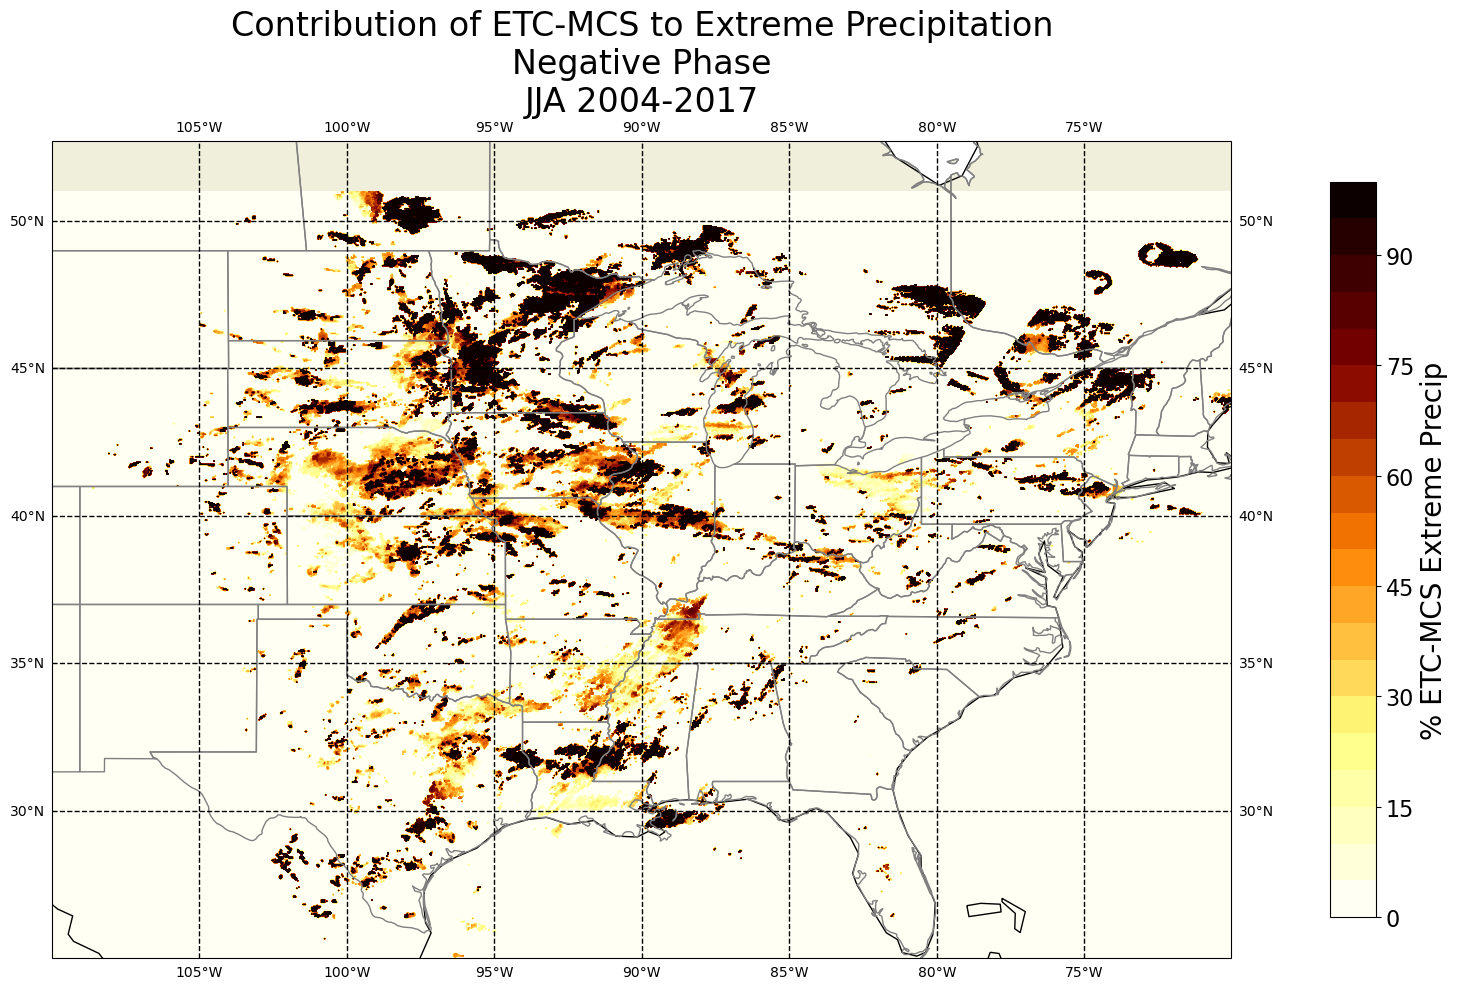

In [28]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.arange(0, 105, 5)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con_neg_jja, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.9)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Extreme Precipitation\nNegative Phase\nJJA 2004-2017', size=24)




# Show the plot
plt.tight_layout()
plt.show()


---

# RESTART FIG3

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute 99th percentile at each grid point
p99 = np.percentile(total_array, 99, axis=0)  # shape: (lat, lon)

# Step 2: Create a mask where total >= 99th percentile (broadcast across time)
mask_99 = total_array >= p99  # shape: (days, lat, lon)

# Step 3: Apply the mask
etc_99 = np.where(mask_99, etc_array, 0)
total_99 = np.where(mask_99, total_array, 0)

# Step 4: Sum over time and compute percent contribution
with np.errstate(divide='ignore', invalid='ignore'):
    ee_con = (np.sum(etc_99, axis=0) / np.sum(total_99, axis=0)) * 100
    ee_con = np.nan_to_num(ee_con)  # Replace NaNs from 0/0 with 0


# Step 1: Compute 99th percentile at each grid point
p99_jja = np.percentile(total_array_jja, 99, axis=0)  # shape: (lat, lon)

# Step 2: Create a mask where total >= 99th percentile (broadcast across time)
mask_99_jja = total_array_jja >= p99_jja  # shape: (days, lat, lon)

# Step 3: Apply the mask
etc_99_jja = np.where(mask_99_jja, etc_array_jja, 0)
total_99_jja = np.where(mask_99_jja, total_array_jja, 0)

# Step 4: Sum over time and compute percent contribution
with np.errstate(divide='ignore', invalid='ignore'):
    ee_con_jja = (np.sum(etc_99_jja, axis=0) / np.sum(total_99_jja, axis=0)) * 100
    ee_con_jja = np.nan_to_num(ee_con_jja)  # Replace NaNs from 0/0 with 0

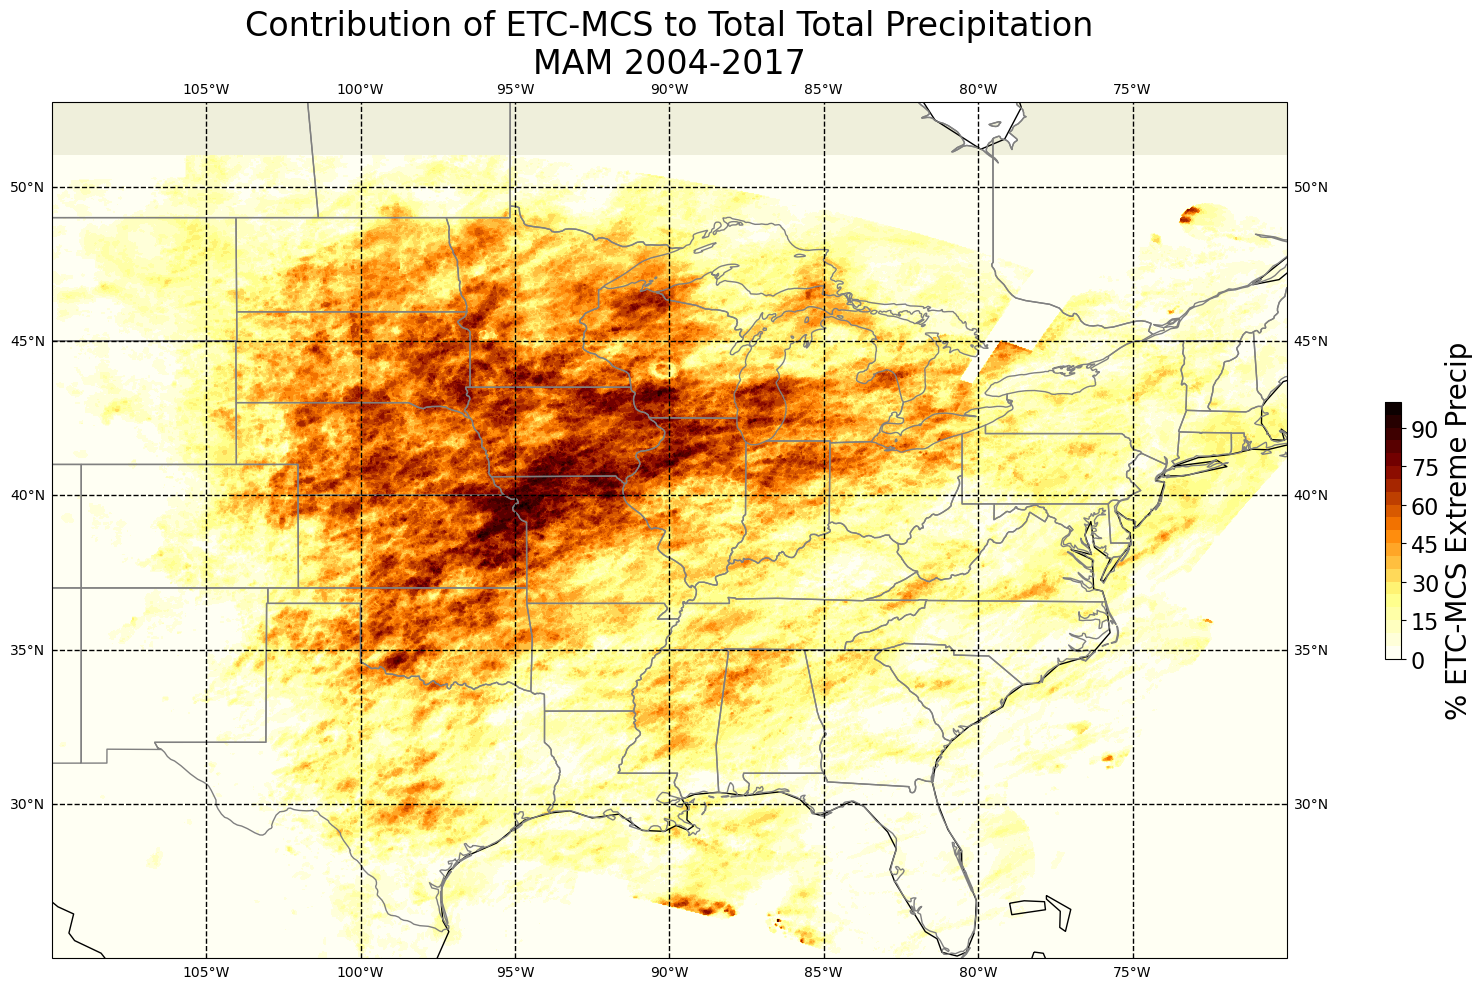

In [24]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.linspace(0, 100, 21)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nMAM 2004-2017', size=24)


# Show the plot
plt.tight_layout()
plt.show()


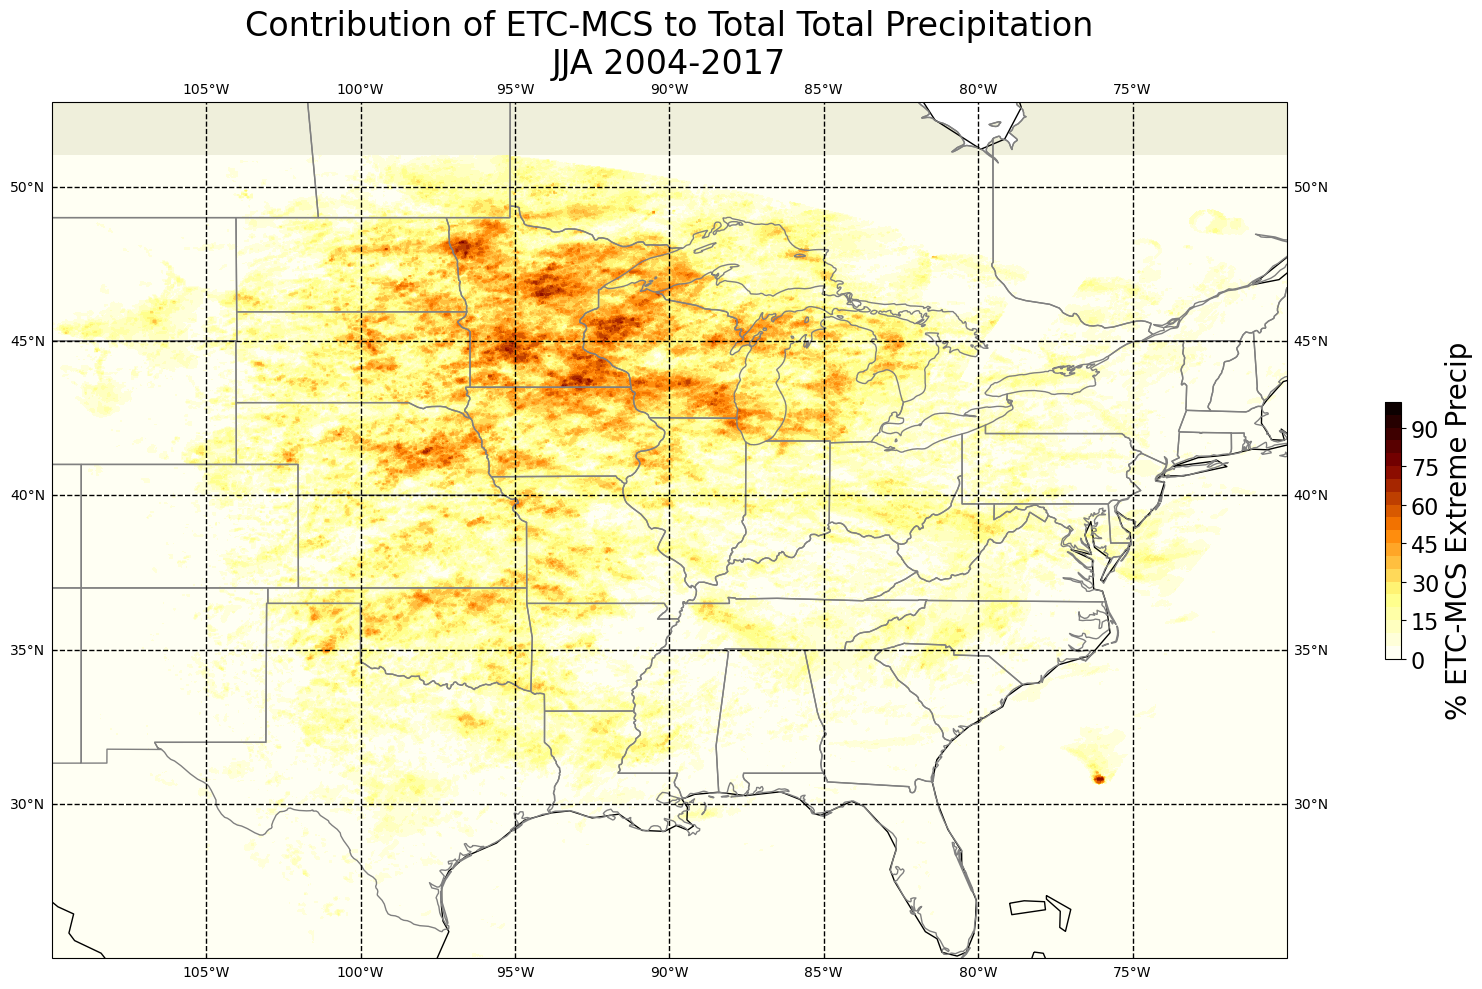

In [25]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.linspace(0, 100, 21)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con_jja, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nJJA 2004-2017', size=24)


# Show the plot
plt.tight_layout()
plt.show()


# FIG 4 BIG PLOT

/tmp/ipykernel_3228725/1420449917.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):
/tmp/ipykernel_3228725/1420449917.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(ds.dims['track']):


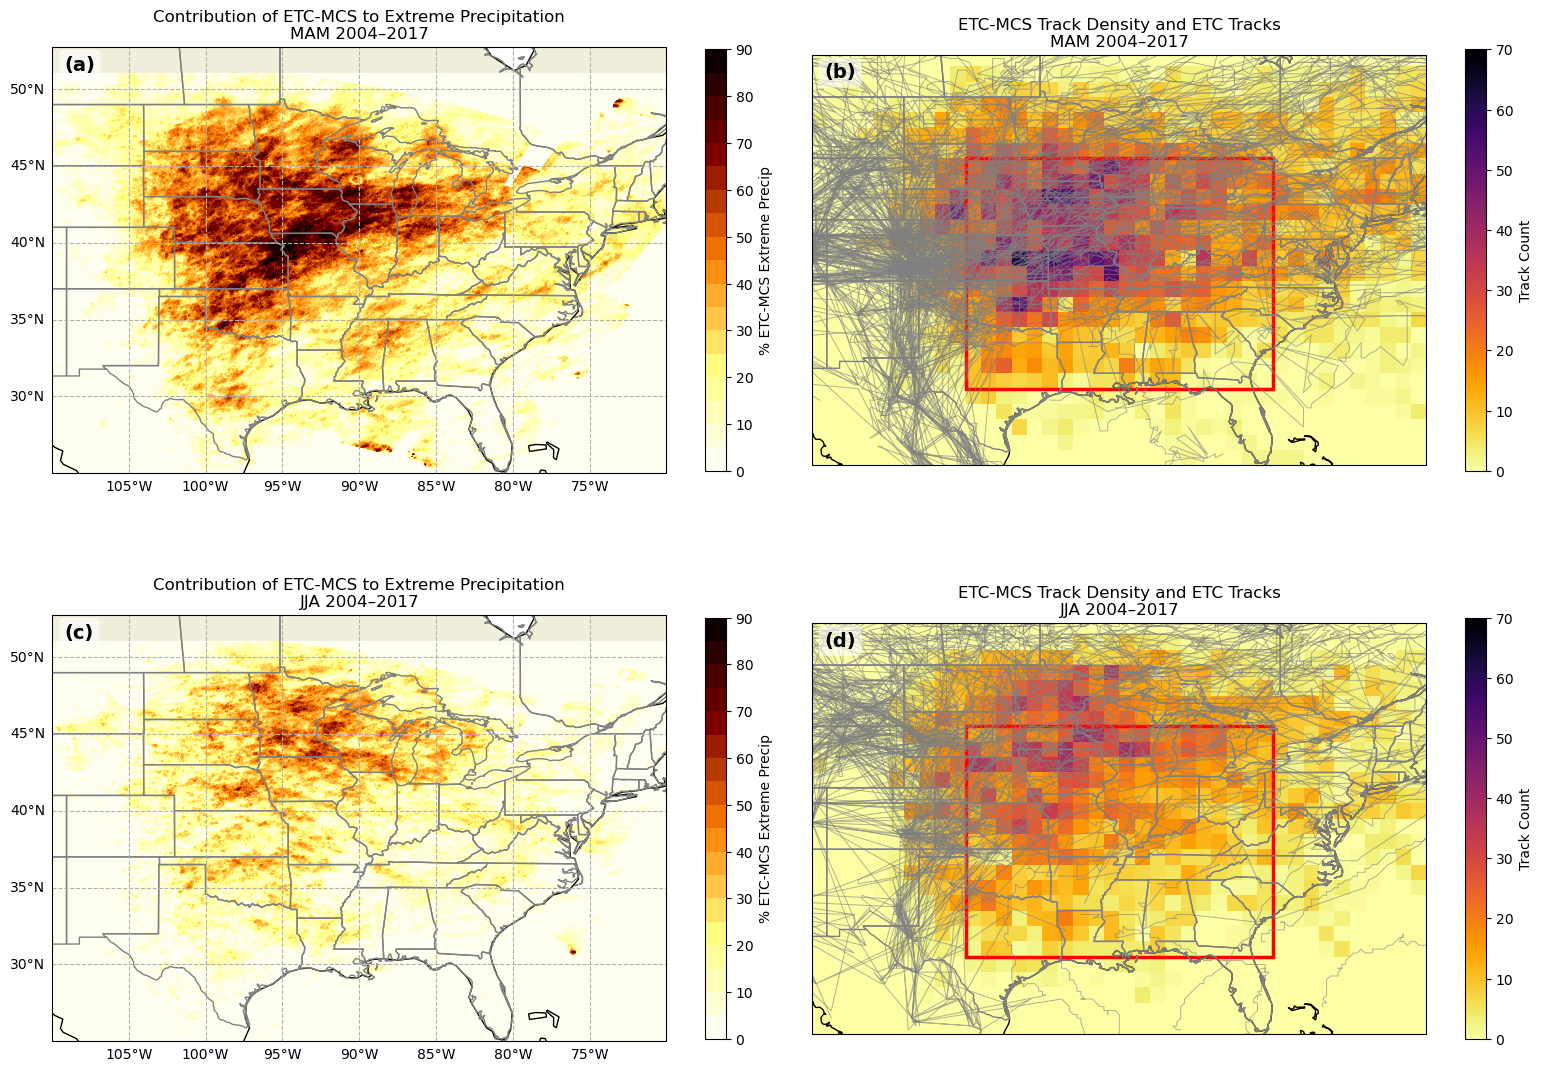

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Assume you have these variables defined from your data:
# lats, lons, ee_con, ee_con_jja, hist_etc, hist_etc_jja
# And bounding box:
lonmin_b, lonmax_b = -100, -80
latmin_b, latmax_b = 30, 45

x, y = np.meshgrid(lons, lats)
clevs = np.arange(0, 90 + 5, 5)

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': ccrs.PlateCarree()})
labels = ['(a)', '(b)', '(c)', '(d)']
for i, ax in enumerate(axs.flat):
    ax.text(0.02, 0.98, labels[i],
            transform=ax.transAxes,
            fontsize=14,
            fontweight='bold',
            va='top',
            ha='left',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round'))

# --- Plot MAM precipitation ---
ax = axs[0, 0]
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
ax.coastlines("110m")
ax.add_feature(cfeature.STATES, edgecolor='grey')
ax.add_feature(cfeature.LAND, edgecolor='grey')
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = gl.right_labels = False
mesh = ax.contourf(x, y, ee_con, levels=clevs, cmap='afmhot_r', transform=ccrs.PlateCarree())
cb = fig.colorbar(mesh, ax=ax, orientation="vertical", shrink=0.7)
cb.set_label('% ETC-MCS Extreme Precip')
ax.set_title('Contribution of ETC-MCS to Extreme Precipitation\nMAM 2004–2017')

# --- Plot JJA precipitation ---
ax = axs[1, 0]
ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
ax.coastlines("110m")
ax.add_feature(cfeature.STATES, edgecolor='grey')
ax.add_feature(cfeature.LAND, edgecolor='grey')
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = gl.right_labels = False
mesh = ax.contourf(x, y, ee_con_jja, levels=clevs, cmap='afmhot_r', transform=ccrs.PlateCarree())
cb = fig.colorbar(mesh, ax=ax, orientation="vertical", shrink=0.7)
cb.set_label('% ETC-MCS Extreme Precip')
ax.set_title('Contribution of ETC-MCS to Extreme Precipitation\nJJA 2004–2017')

# --- Plot MAM track density ---
ax = axs[0, 1]
# im = ax.pcolormesh(lons[:-1], lats[:-1], hist_etc, cmap='inferno_r', vmin=0, vmax=70, transform=ccrs.PlateCarree())
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree(),
                   shading='auto')  # This fixes the mismatch

plot_track_lines(sel_tracks, ax, color='grey')
ax.coastlines("50m")
ax.set_extent([-110,-70,25,50])
ax.add_feature(cfeature.STATES, edgecolor='gray')
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 edgecolor='red', facecolor='none', linewidth=2.5,
                 transform=ccrs.PlateCarree())
ax.add_patch(rect)
cb = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cb.set_label('Track Count')
ax.set_title('ETC-MCS Track Density and ETC Tracks\nMAM 2004–2017')

# --- Plot JJA track density ---
ax = axs[1, 1]
# im = ax.pcolormesh(lons[:-1], lats[:-1], hist_etc_jja, cmap='inferno_r', vmin=0, vmax=70, transform=ccrs.PlateCarree())
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc_jja,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree(),
                   shading='auto')  # This fixes the mismatch
ax.coastlines("50m")
plot_track_lines(sel_tracks_jja, ax, color='grey')
ax.set_extent([-110,-70,25,50])
ax.add_feature(cfeature.STATES, edgecolor='gray')
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 edgecolor='red', facecolor='none', linewidth=2.5,
                 transform=ccrs.PlateCarree())
ax.add_patch(rect)
cb = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cb.set_label('Track Count')
ax.set_title('ETC-MCS Track Density and ETC Tracks\nJJA 2004–2017')

# Final layout
plt.tight_layout()
plt.show()


In [ ]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.linspace(0, 100, 21)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nMAM 2004-2017', size=24)


# Show the plot
plt.tight_layout()
plt.show()


x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.linspace(0, 100, 21)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con_jja, levels=clevs, cmap='afmhot_r')
# plt.cm.rainbow
# con = ax1.contour(x,y,all_std)
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nJJA 2004-2017', size=24)


# Show the plot
plt.tight_layout()
plt.show()


# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc_jja, lon_etc_jja = extract_latlon(dsobs_etc_jja)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc_jja, _, _ = np.histogram2d(lat_etc_jja, lon_etc_jja, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc_jja,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC) JJA')

# # --- Overlay track lines ---
# def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
#     for i in range(ds.dims['track']):
#         lat = ds.lat.isel(track=i).values
#         lon = ds.lon.isel(track=i).values
#         valid = ~np.isnan(lat) & ~np.isnan(lon)
#         if np.sum(valid) < 2:
#             continue
#         ax.plot(lon[valid], lat[valid],
#                 transform=ccrs.PlateCarree(),
#                 color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks_jja, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count')

# --- Final layout ---
plt.title(f'MCS Track Density (ETC)\n{s_list_jja} 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# --- Extract flattened lat/lon from mean positions ---
def extract_latlon(ds):
    lat = ds.meanlat.values.flatten()
    lon = ds.meanlon.values.flatten()
    valid = ~np.isnan(lat) & ~np.isnan(lon)
    return lat[valid], lon[valid]

lat_etc, lon_etc = extract_latlon(dsobs_etc)

# --- Define bins ---
lat_bins = np.arange(20, 71, 1)
lon_bins = np.arange(-180, -51, 1)

# --- 2D histogram ---
hist_etc, _, _ = np.histogram2d(lat_etc, lon_etc, bins=[lat_bins, lon_bins])

# --- Plot setup ---
fig = plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Map formatting ---
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# --- Plot histogram ---
im = ax.pcolormesh(lon_bins, lat_bins, hist_etc,
                   cmap='inferno_r', vmin=0, vmax=70,
                   transform=ccrs.PlateCarree())
ax.set_title('MCS Track Density (ETC)')

# --- Overlay track lines ---
def plot_track_lines(ds, ax, color='white', linewidth=0.7, alpha=0.6):
    for i in range(ds.dims['track']):
        lat = ds.lat.isel(track=i).values
        lon = ds.lon.isel(track=i).values
        valid = ~np.isnan(lat) & ~np.isnan(lon)
        if np.sum(valid) < 2:
            continue
        ax.plot(lon[valid], lat[valid],
                transform=ccrs.PlateCarree(),
                color=color, linewidth=linewidth, alpha=alpha)

plot_track_lines(sel_tracks, ax, color='grey')

# --- Add red bounding box (if defined) ---
rect = Rectangle((lonmin_b, latmin_b), lonmax_b - lonmin_b, latmax_b - latmin_b,
                 linewidth=2.5, edgecolor='red', facecolor='none',
                 transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(rect)

# --- Colorbar ---
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Track Count')

# --- Final layout ---
plt.title(f'MCS Track Density (ETC)\n{s_list} 2004-2017', fontsize=14)
plt.tight_layout()
plt.show()

